In [105]:
import numpy as np
import matplotlib as mpl
%matplotlib inline

import matplotlib.pyplot as plt

def shift_latt(grid):
    
    if doBounce == True:
        saved_latt = np.ma.masked_where(mask is True, latt)
    
    # center (0,0)
    # stays constant
        
    # east (0,1)
    ch = 1
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=1, axis=1)
        
    # north (-1, 0)
    ch = 2
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=-1, axis=0)
        
    # west (0, -1)
    ch = 3
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=-1, axis=1)
        
    # south (1, 0)
    ch = 4
    grid[:, :, ch] = np.roll(grid[:, :, ch], shift=1, axis=0)
        
    # north-east(-1, 1)
    ch = 5
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=-1, axis=0), shift=1, axis=1)
        
    # north-west(-1, -1)
    ch = 6
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=-1, axis=0), shift=-1, axis=1)
        
    # south-west(1, -1)
    ch = 7
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=1, axis=0), shift=-1, axis=1)
        
    # south-east(1, 1)
    ch = 8
    grid[:, :, ch] = np.roll(np.roll(grid[:, :, ch], shift=1, axis=0), shift=1, axis=1)

    if doBounce == True:
        #print("Bounce")
        # top row
        if mask[0,0,2] == True:
            #print("Top Row")
            # channel 2->4, 5->7,  6->8
            grid[0,:,4] = saved_latt[0,:,2]
            grid[0,1:,7] = saved_latt[0,1:,5]
            grid[0,:,8] = saved_latt[0,:,6]
        # bottom row
        if mask[-1,0,4] == True:
            #print("Bottom Row")
            # 4->2, 7->5, 8->6
            grid[-1,:,2] = saved_latt[-1,:,4]
            grid[-1,:-1,5] = saved_latt[-1,:-1,7]
            grid[-1,:,6] = saved_latt[-1,:,8]
        
        # left column
        if mask[0,0,3] == True:
            #rint("Left Column")
            # 3->1, 7->5, 6->8
            grid[:,0,1] = saved_latt[:,0,3]
            grid[1:,0,5] = saved_latt[1:,0,7]
            grid[:-1,0,8] = saved_latt[-1:,0,6]
        
        # right column
        if mask[0,-1,1] == True:
            #print("Right Column")
            # 1->3, 5->7, 8->6
            grid[:,-1,3] = saved_latt[:,-1,1]
            grid[:-1,-1,7] = saved_latt[:-1,-1,5]
            grid[1:,-1,6] = saved_latt[1:,-1,8]
        
            # handle corners
            grid[0,0,5] = saved_latt[0,0,5]
            grid[-1,-1,5] = saved_latt[-1,-1,5]
        
            grid[0,-1,6] = saved_latt[0,0,6]
            grid[-1,0,6] = saved_latt[-1,0,6]
        
            grid[0,0,7] = saved_latt[0,0,7]
            grid[-1,-1,7] = saved_latt[-1,-1,7]
        
            grid[0,-1,8] = saved_latt[0,-1,8]
            grid[-1,0,8] = saved_latt[-1,0,8]
        
    return grid 
            
def sum_occ(mat):
    occ = np.sum(mat, axis=2)
    return occ

def calc_j(c, mat):
    #j = np.dot(mat, c)
    
    # Alternative
    j1 = np.einsum('abc, cd-> abd', mat, c)
    
    return j1


def calc_avg_vel(rho, j):
    #u = j / rho.reshape(rows, cols, 1)
 
    # Alternative
    u = (j.T / rho.T).T
    
    return u

def calc_equilibrium(rho, u, c, w):
    cu = np.einsum('ab, cdb -> cda', c, u)
    cu2 = cu**2
    u2 = np.einsum('abc, abc -> ab', u, u)
    
    f_eq = np.zeros((rows, cols, q))

    f_eq[:,:,0] = 4 / 9 * rho * (1 + 3 * cu[:,:,0] + 9/2 * cu2[:,:,0] - 3/2 * u2)
    f_eq[:,:,1] = 1 / 9 * rho * (1 + 3 * cu[:,:,1] + 9/2 * cu2[:,:,1] - 3/2 * u2)
    f_eq[:,:,2] = 1 / 9 * rho * (1 + 3 * cu[:,:,2] + 9/2 * cu2[:,:,2] - 3/2 * u2)
    f_eq[:,:,3] = 1 / 9 * rho * (1 + 3 * cu[:,:,3] + 9/2 * cu2[:,:,3] - 3/2 * u2)
    f_eq[:,:,4] = 1 / 9 * rho * (1 + 3 * cu[:,:,4] + 9/2 * cu2[:,:,4] - 3/2 * u2)
    f_eq[:,:,5] = 1 / 36 * rho * (1 + 3 * cu[:,:,5] + 9/2 * cu2[:,:,5] - 3/2 * u2)
    f_eq[:,:,6] = 1 / 36 * rho * (1 + 3 * cu[:,:,6] + 9/2 * cu2[:,:,6] - 3/2 * u2)
    f_eq[:,:,7] = 1 / 36 * rho * (1 + 3 * cu[:,:,7] + 9/2 * cu2[:,:,7] - 3/2 * u2)
    f_eq[:,:,8] = 1 / 36 * rho * (1 + 3 * cu[:,:,8] + 9/2 * cu2[:,:,8] - 3/2 * u2)
    
    return f_eq

#################
rows = 100
cols = 100
q = 9
timesteps = 1000

doBounce = False

c = np.array([[0,0], [0,1], [-1,0], [0,-1], [1,0], [-1,1], [-1,-1], [1,-1], [1,1]])
#c1 = np.array([[0,0], [1,0], [0,-1], [-1,0], [0,1], [1,-1], [-1,-1], [-1,1], [1,1]])

latt = np.zeros((rows, cols, q))

# initial lattice occupation
latt[:,:,0] = 4 / 9
latt[:,:,1] = 1 / 9
latt[:,:,2] = 1 / 9
latt[:,:,3] = 1 / 9
latt[:,:,4] = 1 / 9
latt[:,:,5] = 1 / 36
latt[:,:,6] = 1 / 36
latt[:,:,7] = 1 / 36
latt[:,:,8] = 1 / 36

#ch = 3
w = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])
omega = 0.01

for t in range(timesteps):
    #print(latt[:,:,3])
    latt = shift_latt(latt)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(rho, u, c, w)
    latt += (omega * (f_eq - latt))

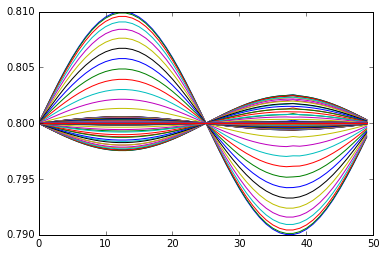

In [83]:
def set_rho(epsilon, rho0, rows, cols):
    
    rho = np.full((rows,cols), rho0, dtype = float)
    valx = (2 * np.pi * np.arange(cols)) / (cols)
    rho += epsilon * np.sin(valx).reshape(1, cols)
    return rho

# shear wave rho decay init
epsilon = 0.01
rho0 = 0.8
assert(rho0 > epsilon), "rho0 must be bigger than the sine-offset"
rho = set_rho(epsilon, rho0, rows, cols)
u = np.zeros((rows, cols, 2))

omega = 0.2

# Belegung des lattice, dass das mit rho, welches ich in der funktion set_rho berechnet habe, passt
latt = calc_equilibrium(rho, u, c, w) # which is equal to f_eq

plt.figure()

for t in range(timesteps):
    if t%2 == 0:
        plt.plot(rho[rows//4,:]) 
    latt = shift_latt(latt)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(rho, u, c, w)
    latt += omega * (f_eq - latt)
    
#plt.savefig('Set_Rho_50_50_400_t_10.pdf')

Omega= 0.5
Nu_noise_calc=  0.5
0.5
Nu_noise_at_point ( 0 ) =  nan 

Nu_noise_all= nan 

Nu_exact= nan 



/usr/lib/python3.3/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.3/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in log
/usr/lib/python3.3/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in log


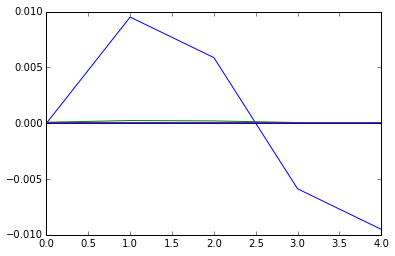

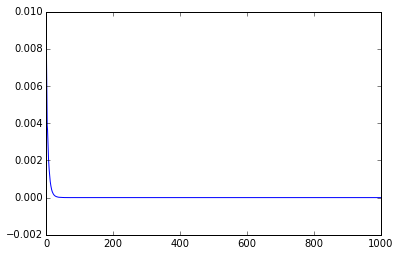

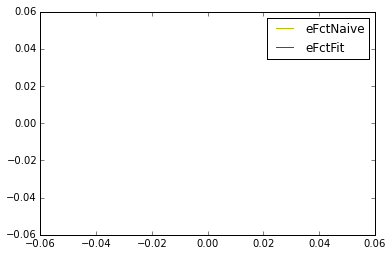

In [95]:
def set_u(epsilon, rows, cols):
    
    u = np.zeros((rows,cols, 2), dtype = float)
    valy = (2 * np.pi * np.arange(rows)) / (rows)
    u[:,:,1] = epsilon * np.sin(valy).reshape(rows, 1)
    return u

# shear wave u decay init
epsilon = 0.01
rho = np.full((rows,cols), 1., dtype=float)
u = set_u(epsilon, rows, cols)

omega = 0.5

# Belegung des lattice, dass das mit u, welches ich in der funktion set_u berechnet habe, passt
latt = calc_equilibrium(rho, u, c, w) # which is equal to f_eq

# plot stuff
o = np.zeros((1,0), dtype=float);
plt.figure()

for t in range(timesteps):
    if t%20 == 0:
        plt.plot(u[:,0,1], label='{t}'.format(t=t))
    o = np.append(o, u[rows//4,0,1])
    latt = shift_latt(latt)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(rho, u, c, w)
    latt += omega * (f_eq - latt)

# plot stuff
t = np.arange(timesteps)
#t = np.arange(len(o)) # use this, if o = np.append() is in modulo loop

#plt.legend(loc='best')
#plt.savefig('Set_U_50_50_400_t_10.pdf')
plt.figure()
plt.plot(t, o, label="decay")
#plt.savefig('Set_U_50_50_400_t_10_Shear_Wave_Decay.pdf')

# fittig stuff

plt.figure()
print("Omega=", omega)

nu_calc = 1 / 6 * (2 / omega - 1)
nu_calc1 = 1 / 3 * (1 /omega - 1/2)
print("Nu_noise_calc= ",nu_calc)
print(nu_calc1)

point = rows // 10

k = (2 * np.pi) / cols
nu_noise = (np.log(o[0]) - np.log(o[point]))  / (k** 2 * point)
print("Nu_noise_at_point (",point,")", "= ",'%.10f \n' %  nu_noise)


nu_noise_all = (np.log(o[0]) - np.log(o[t[1::]]))  / (k** 2 * t[1::])
print('Nu_noise_all= %.10f \n' % np.mean(nu_noise_all))

eFctNaive = o[0] * np.exp(-nu_noise * k**2 * t)
plt.plot(t, eFctNaive, 'y', label="eFctNaive")

lnU = np.log(o)
t = np.arange(timesteps).reshape((-1,1))

phi = np.concatenate((t, np.ones((len(t), 1))), axis=1)

# Linear Least Squares
coeffLn = np.linalg.inv(phi.T.dot(phi)).dot(phi.T).dot(lnU)

#print("Coefficients for linear log(u) fit = %s \n" % coeffLn)
#line = coeffLn[0] * t + coeffLn[1]

A = np.exp(coeffLn[1])
lamb = coeffLn[0]
eFctFit = A * np.exp(lamb * t)
plt.plot(t, eFctFit, 'r', label="eFctFit")

nuExact = (np.log(eFctFit[0]) - np.log(eFctFit[point]))  / (k** 2 * point)
print('Nu_exact= %.10f \n' % nuExact)


plt.legend(loc='best')

In [87]:
def mask_couette(grid):
    
    # mask top row
    mask[0,:,2] = True
    mask[0,:,5] = True
    mask[0,:,6] = True
    
    # mask bottom row
    mask[-1,:,4] = True
    mask[-1,:,7] = True
    mask[-1,:,8] = True
    
    return mask
    
latt[:,:,0] = 0
latt[:,:,1] = 0
latt[:,:,2] = 0
latt[:,:,3] = 0
latt[:,:,4] = 0
latt[:,:,5] = 0
latt[:,:,6] = 0
latt[:,:,7] = 0
latt[:,:,8] = 0

latt[0,:,6] = 0.5

saved_latt = np.zeros((latt.shape))
mask = np.zeros((latt.shape))

mask = mask_couette(latt)

doBounce = True

for t in range(timesteps):
    #print(latt[:,:,6])
    #print(latt[:,:,8])
    latt = shift_latt(latt)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    #f_eq = calc_equilibrium(rho, u, c, w)
    #latt += omega * (f_eq - latt)

/usr/lib/python3.3/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in true_divide


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[-0.00143725  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.         -0.00143313]]
[[ -1.68485258e-03   1.38752901e-17   6.93889390e-18 ...,   6.93889390e-18
    6.93889390e-18   6.94096495e-18]
 [ -3.29055213e-04  -2.24108308e-05  -6.93889390e-18 ...,  -6.93889390e-18
   -6.93889390e-18  -8.44827807e-04]
 [ -1.38777878e-17  -1.38777878e-17  -1.38777878e-17 ...,  -1.38777878e-17
   -1.3877787

[[ -7.59925503e-03   4.70968574e-05   7.25082732e-05 ...,  -1.47227622e-04
   -2.14787645e-04  -3.77113622e-04]
 [ -2.03789764e-03  -2.27737167e-04   2.14282541e-04 ...,  -4.16979233e-04
   -7.18224134e-04  -4.95570705e-03]
 [ -1.70985994e-03  -9.18393334e-05  -2.16561752e-05 ...,  -7.53032586e-04
   -3.30643035e-03  -1.80916774e-03]
 ..., 
 [ -1.58745071e-03  -3.35894533e-03  -7.92995547e-04 ...,   9.32515568e-05
    4.75258604e-05  -1.28720110e-03]
 [ -4.87778080e-03  -7.33363692e-04  -4.51700160e-04 ...,   2.14465942e-04
   -3.57725544e-05  -1.56935781e-03]
 [ -3.83349862e-04  -2.28127961e-04  -1.59097699e-04 ...,   7.65670984e-05
    7.00133106e-05  -7.10345949e-03]]
[[ -7.64316051e-03   5.55980625e-05   8.15785421e-05 ...,  -1.41096720e-04
   -2.07373732e-04  -3.71575800e-04]
 [ -2.06184759e-03  -2.38157426e-04   2.09031169e-04 ...,  -4.30399676e-04
   -7.34002120e-04  -4.99828734e-03]
 [ -1.71719745e-03  -8.44599236e-05  -1.33660810e-05 ...,  -7.54454996e-04
   -3.32615246e-03  -

[[ -8.39044859e-03   6.04262217e-05   9.04551010e-05 ...,  -1.61186983e-04
   -2.33315710e-04  -4.11073024e-04]
 [ -2.29396455e-03  -2.64148660e-04   2.41350847e-04 ...,  -4.87995314e-04
   -8.19764725e-04  -5.51766968e-03]
 [ -1.94091969e-03  -1.03291597e-04  -1.04495537e-05 ...,  -8.72191431e-04
   -3.71383376e-03  -2.05992970e-03]
 ..., 
 [ -1.76112442e-03  -3.74348808e-03  -9.06664322e-04 ...,   1.40875159e-04
    8.41030785e-05  -1.41471812e-03]
 [ -5.39259749e-03  -8.28020518e-04  -5.23144200e-04 ...,   2.51664488e-04
   -2.91504942e-05  -1.73298895e-03]
 [ -4.13949472e-04  -2.46275208e-04  -1.72181113e-04 ...,   9.76000139e-05
    9.10178064e-05  -7.79738007e-03]]
[[ -8.41032237e-03   5.67137644e-05   8.63623404e-05 ...,  -1.65137779e-04
   -2.37954191e-04  -4.15454989e-04]
 [ -2.29585410e-03  -2.60709666e-04   2.46008078e-04 ...,  -4.85136237e-04
   -8.17588725e-04  -5.52654070e-03]
 [ -1.94957420e-03  -1.07769564e-04  -1.45843085e-05 ...,  -8.78124307e-04
   -3.72575885e-03  -

[[ -8.75148940e-03   6.22846846e-05   9.42106338e-05 ...,  -1.67695814e-04
   -2.43027368e-04  -4.28293289e-04]
 [ -2.40283246e-03  -2.78236814e-04   2.54048994e-04 ...,  -5.06673309e-04
   -8.53867768e-04  -5.76170814e-03]
 [ -2.04366711e-03  -1.15559018e-04  -1.33718153e-05 ...,  -9.13646451e-04
   -3.88536025e-03  -2.16809099e-03]
 ..., 
 [ -1.83625585e-03  -3.90724212e-03  -9.49947160e-04 ...,   1.55170260e-04
    9.45573668e-05  -1.47200330e-03]
 [ -5.61626949e-03  -8.61707458e-04  -5.44846345e-04 ...,   2.68984137e-04
   -2.39916613e-05  -1.80156149e-03]
 [ -4.30792852e-04  -2.56844150e-04  -1.79765343e-04 ...,   1.02962735e-04
    9.61683309e-05  -8.11357377e-03]]
[[ -8.76235998e-03   5.99186154e-05   9.15479605e-05 ...,  -1.70100372e-04
   -2.45824215e-04  -4.30906087e-04]
 [ -2.40356976e-03  -2.76069249e-04   2.56918829e-04 ...,  -5.04736305e-04
   -8.52350208e-04  -5.76617932e-03]
 [ -2.04859961e-03  -1.18413623e-04  -1.61424449e-05 ...,  -9.16993741e-04
   -3.89187256e-03  -

    9.89469230e-05  -8.29902201e-03]]
[[ -8.97097456e-03   6.12403185e-05   9.41025406e-05 ...,  -1.73054790e-04
   -2.50545108e-04  -4.40234489e-04]
 [ -2.46754371e-03  -2.86289471e-04   2.62027274e-04 ...,  -5.15592043e-04
   -8.72357503e-04  -5.90730587e-03]
 [ -2.10760108e-03  -1.26737110e-04  -1.92114467e-05 ...,  -9.38315911e-04
   -3.98824443e-03  -2.23444079e-03]
 ..., 
 [ -1.88251639e-03  -4.00559003e-03  -9.76568403e-04 ...,   1.60729095e-04
    9.80505006e-05  -1.50800960e-03]
 [ -5.74913662e-03  -8.80120543e-04  -5.55858879e-04 ...,   2.80315200e-04
   -1.98771333e-05  -1.84158104e-03]
 [ -4.42677479e-04  -2.64976690e-04  -1.86118418e-04 ...,   1.04119029e-04
    9.71748062e-05  -8.30527629e-03]]
[[ -8.97590418e-03   6.29775970e-05   9.61314058e-05 ...,  -1.71562205e-04
   -2.48896562e-04  -4.38984344e-04]
 [ -2.47086372e-03  -2.88423810e-04   2.60298915e-04 ...,  -5.17596348e-04
   -8.74605458e-04  -5.91264649e-03]
 [ -2.10771224e-03  -1.25246623e-04  -1.74387592e-05 ..., 

[[ -9.08161205e-03   6.27382130e-05   9.64850603e-05 ...,  -1.73797367e-04
   -2.52070595e-04  -4.44454757e-04]
 [ -2.50425230e-03  -2.94945689e-04   2.61439995e-04 ...,  -5.23987884e-04
   -8.85639715e-04  -5.98464292e-03]
 [ -2.14016429e-03  -1.32658725e-04  -2.22481758e-05 ...,  -9.50253996e-04
   -4.04011971e-03  -2.26804528e-03]
 ..., 
 [ -1.90559682e-03  -4.05498780e-03  -9.89314387e-04 ...,   1.63841053e-04
    1.00086311e-04  -1.52608128e-03]
 [ -5.81985240e-03  -8.93501662e-04  -5.65537523e-04 ...,   2.81806057e-04
   -2.20332865e-05  -1.86560967e-03]
 [ -4.46631660e-04  -2.66803976e-04  -1.86997389e-04 ...,   1.07041146e-04
    1.00008353e-04  -8.40173275e-03]]
[[ -9.08719025e-03   6.12919578e-05   9.48557567e-05 ...,  -1.75220089e-04
   -2.53698979e-04  -4.45972802e-04]
 [ -2.50462749e-03  -2.93849242e-04   2.62908904e-04 ...,  -5.22989967e-04
   -8.84868015e-04  -5.98687325e-03]
 [ -2.14307903e-03  -1.34611013e-04  -2.42016733e-05 ...,  -9.52337617e-04
   -4.04374839e-03  -

[[ -9.18880993e-03   6.05422769e-05   9.47286913e-05 ...,  -1.77889960e-04
   -2.57214750e-04  -4.51726462e-04]
 [ -2.53913440e-03  -3.02893894e-04   2.61164299e-04 ...,  -5.31877398e-04
   -8.98146431e-04  -6.05818584e-03]
 [ -2.17807738e-03  -1.45927002e-04  -3.30119604e-05 ...,  -9.68795206e-04
   -4.09598695e-03  -2.30685232e-03]
 ..., 
 [ -1.93473895e-03  -4.10884812e-03  -1.00892802e-03 ...,   1.59147270e-04
    9.44170681e-05  -1.55039240e-03]
 [ -5.88734943e-03  -9.05838460e-04  -5.74306572e-04 ...,   2.83649234e-04
   -2.36821527e-05  -1.88845536e-03]
 [ -4.53859071e-04  -2.72214124e-04  -1.91576747e-04 ...,   1.06058669e-04
    9.89328009e-05  -8.49593881e-03]]
[[ -9.19185577e-03   6.17044784e-05   9.60857119e-05 ...,  -1.76897208e-04
   -2.56119121e-04  -4.50885958e-04]
 [ -2.54127229e-03  -3.04316530e-04   2.59981109e-04 ...,  -5.33209558e-04
   -8.99619791e-04  -6.06157850e-03]
 [ -2.17811320e-03  -1.44962835e-04  -3.18550214e-05 ...,  -9.68120486e-04
   -4.09674029e-03  -

    1.02357857e-04  -8.56647514e-03]]
[[ -9.27255282e-03   6.23650853e-05   9.70435915e-05 ...,  -1.77689282e-04
   -2.57710935e-04  -4.54104296e-04]
 [ -2.56104567e-03  -3.03171942e-04   2.67018104e-04 ...,  -5.31951091e-04
   -9.01888383e-04  -6.11127470e-03]
 [ -2.19563542e-03  -1.43368644e-04  -2.84579647e-05 ...,  -9.70533282e-04
   -4.12812055e-03  -2.32510655e-03]
 ..., 
 [ -1.94583316e-03  -4.14005159e-03  -1.01198542e-03 ...,   1.67274470e-04
    1.02069776e-04  -1.55780121e-03]
 [ -5.93625273e-03  -9.10121189e-04  -5.75642205e-04 ...,   2.90194217e-04
   -1.97210901e-05  -1.90133514e-03]
 [ -4.56398845e-04  -2.73150678e-04  -1.91775573e-04 ...,   1.08493026e-04
    1.01386187e-04  -8.56945186e-03]]
[[ -9.27471768e-03   6.33922696e-05   9.82355029e-05 ...,  -1.76793132e-04
   -2.56719399e-04  -4.53328362e-04]
 [ -2.56251057e-03  -3.04124627e-04   2.66236179e-04 ...,  -5.32799628e-04
   -9.02842797e-04  -6.11366185e-03]
 [ -2.19519368e-03  -1.42170829e-04  -2.71097221e-05 ..., 

[[ -9.33075272e-03   6.36168343e-05   9.87640046e-05 ...,  -1.77399499e-04
   -2.57844155e-04  -4.55743461e-04]
 [ -2.57860199e-03  -3.06099603e-04   2.68242135e-04 ...,  -5.33956191e-04
   -9.06582606e-04  -6.15004224e-03]
 [ -2.20888924e-03  -1.42890164e-04  -2.65932721e-05 ...,  -9.71979480e-04
   -4.15082230e-03  -2.33863052e-03]
 ..., 
 [ -1.95397697e-03  -4.16187981e-03  -1.01459311e-03 ...,   1.72617124e-04
    1.06898188e-04  -1.56341314e-03]
 [ -5.97161865e-03  -9.15365263e-04  -5.78923287e-04 ...,   2.92545309e-04
   -1.92391036e-05  -1.91226926e-03]
 [ -4.57966494e-04  -2.73576237e-04  -1.91690161e-04 ...,   1.10533300e-04
    1.03375448e-04  -8.61981511e-03]]
[[ -9.33369235e-03   6.27508770e-05   9.77694879e-05 ...,  -1.78220235e-04
   -2.58807987e-04  -4.56615651e-04]
 [ -2.57876665e-03  -3.05492892e-04   2.69042459e-04 ...,  -5.33370877e-04
   -9.06131657e-04  -6.15115015e-03]
 [ -2.21050754e-03  -1.44048295e-04  -2.77809351e-05 ...,  -9.73124715e-04
   -4.15275913e-03  -

[[ -9.39274548e-03   6.17795369e-05   9.72519723e-05 ...,  -1.79978210e-04
   -2.61028964e-04  -4.60362527e-04]
 [ -2.60179500e-03  -3.14423371e-04   2.64103590e-04 ...,  -5.41031887e-04
   -9.16562771e-04  -6.19488935e-03]
 [ -2.23327746e-03  -1.53744612e-04  -3.61892232e-05 ...,  -9.83957400e-04
   -4.18444404e-03  -2.36311456e-03]
 ..., 
 [ -1.97285185e-03  -4.19459601e-03  -1.02756939e-03 ...,   1.67497595e-04
    1.01181569e-04  -1.57969894e-03]
 [ -6.01312208e-03  -9.25437176e-04  -5.86861595e-04 ...,   2.90298671e-04
   -2.34918396e-05  -1.92847021e-03]
 [ -4.62478911e-04  -2.76951580e-04  -1.94540036e-04 ...,   1.09648656e-04
    1.02413687e-04  -8.67458640e-03]]
[[ -9.39541742e-03   6.10478692e-05   9.63881551e-05 ...,  -1.80670534e-04
   -2.61871090e-04  -4.61102847e-04]
 [ -2.60202114e-03  -3.13943321e-04   2.64756603e-04 ...,  -5.40570694e-04
   -9.16230152e-04  -6.19598455e-03]
 [ -2.23477723e-03  -1.54815135e-04  -3.72947068e-05 ...,  -9.85020109e-04
   -4.18624723e-03  -

[[ -9.44877702e-03   6.18420865e-05   9.76413013e-05 ...,  -1.80908882e-04
   -2.62438845e-04  -4.63029028e-04]
 [ -2.61907530e-03  -3.17642188e-04   2.64876191e-04 ...,  -5.43903807e-04
   -9.21914746e-04  -6.23264019e-03]
 [ -2.24983640e-03  -1.57374812e-04  -3.85615055e-05 ...,  -9.89834984e-04
   -4.21033803e-03  -2.38001368e-03]
 ..., 
 [ -1.98469099e-03  -4.21971831e-03  -1.03381582e-03 ...,   1.68522250e-04
    1.01817571e-04  -1.58910610e-03]
 [ -6.04836907e-03  -9.30733532e-04  -5.90145351e-04 ...,   2.92293675e-04
   -2.32955863e-05  -1.93960565e-03]
 [ -4.65111252e-04  -2.78510428e-04  -1.95606005e-04 ...,   1.10399496e-04
    1.03139846e-04  -8.72487546e-03]]
[[ -9.45083783e-03   6.13192946e-05   9.69772963e-05 ...,  -1.81408738e-04
   -2.63093247e-04  -4.63554001e-04]
 [ -2.61901910e-03  -3.16990196e-04   2.65672502e-04 ...,  -5.43310159e-04
   -9.21420504e-04  -6.23328783e-03]
 [ -2.25073626e-03  -1.57914250e-04  -3.91340742e-05 ...,  -9.90427489e-04
   -4.21150812e-03  -

[[ -9.49233272e-03   6.27852851e-05   9.87342313e-05 ...,  -1.80881941e-04
   -2.62886714e-04  -4.64245520e-04]
 [ -2.62863526e-03  -3.15657053e-04   2.70218919e-04 ...,  -5.42162256e-04
   -9.22022691e-04  -6.25859235e-03]
 [ -2.25742306e-03  -1.54407507e-04  -3.44331397e-05 ...,  -9.89407539e-04
   -4.22563276e-03  -2.38804205e-03]
 ..., 
 [ -1.98782459e-03  -4.23346841e-03  -1.03311167e-03 ...,   1.75914500e-04
    1.08789502e-04  -1.59011717e-03]
 [ -6.07129374e-03  -9.30232271e-04  -5.88195942e-04 ...,   2.99028318e-04
   -1.80776861e-05  -1.94347052e-03]
 [ -4.66261373e-04  -2.78921420e-04  -1.95697417e-04 ...,   1.11927152e-04
    1.04624815e-04  -8.76286687e-03]]
[[ -9.49333582e-03   6.32985537e-05   9.94218864e-05 ...,  -1.80448935e-04
   -2.62308190e-04  -4.63877285e-04]
 [ -2.62931860e-03  -3.16141005e-04   2.69826409e-04 ...,  -5.42601951e-04
   -9.22486695e-04  -6.25971163e-03]
 [ -2.25712943e-03  -1.53755646e-04  -3.36630894e-05 ...,  -9.88861937e-04
   -4.22559445e-03  -

[[ -9.52525134e-03   6.44826348e-05   1.00839894e-04 ...,  -1.79838052e-04
   -2.61962135e-04  -4.64271219e-04]
 [ -2.63607609e-03  -3.14457488e-04   2.74002741e-04 ...,  -5.40625063e-04
   -9.21956581e-04  -6.27839762e-03]
 [ -2.26110751e-03  -1.49929934e-04  -2.89116040e-05 ...,  -9.86277273e-04
   -4.23485378e-03  -2.39198942e-03]
 ..., 
 [ -1.98743289e-03  -4.24097719e-03  -1.02982258e-03 ...,   1.84298907e-04
    1.16773378e-04  -1.58816773e-03]
 [ -6.08790855e-03  -9.29935166e-04  -5.86867753e-04 ...,   3.03914627e-04
   -1.43001443e-05  -1.94618572e-03]
 [ -4.65911225e-04  -2.77948648e-04  -1.94458300e-04 ...,   1.14411365e-04
    1.07059096e-04  -8.78999122e-03]]
[[ -9.52649188e-03   6.41416956e-05   1.00329613e-04 ...,  -1.80149099e-04
   -2.62449223e-04  -4.64587548e-04]
 [ -2.63596555e-03  -3.13944135e-04   2.74599188e-04 ...,  -5.40132248e-04
   -9.21546345e-04  -6.27870216e-03]
 [ -2.26163198e-03  -1.50239166e-04  -2.92737187e-05 ...,  -9.86583259e-04
   -4.23551051e-03  -

[[ -9.54886238e-03   6.47410243e-05   1.01082906e-04 ...,  -1.79888027e-04
   -2.62385222e-04  -4.65042655e-04]
 [ -2.64144326e-03  -3.13583235e-04   2.76686676e-04 ...,  -5.39362562e-04
   -9.21812425e-04  -6.29234403e-03]
 [ -2.26543423e-03  -1.48661708e-04  -2.70574815e-05 ...,  -9.85549534e-04
   -4.24273921e-03  -2.39636737e-03]
 ..., 
 [ -1.98888922e-03  -4.24753127e-03  -1.02940331e-03 ...,   1.87767253e-04
    1.20076959e-04  -1.58862701e-03]
 [ -6.09892015e-03  -9.29540755e-04  -5.85731442e-04 ...,   3.07224831e-04
   -1.16996142e-05  -1.94797059e-03]
 [ -4.66705753e-04  -2.78390810e-04  -1.94737703e-04 ...,   1.14838188e-04
    1.07480015e-04  -8.80850116e-03]]
[[ -9.54954923e-03   6.50623279e-05   1.01594070e-04 ...,  -1.79617259e-04
   -2.61948484e-04  -4.64829092e-04]
 [ -2.64196650e-03  -3.14015292e-04   2.76319368e-04 ...,  -5.39741179e-04
   -9.22193834e-04  -6.29314442e-03]
 [ -2.26530008e-03  -1.48300193e-04  -2.65898334e-05 ...,  -9.85225883e-04
   -4.24275576e-03  -

[[ -9.57012382e-03   6.48009642e-05   1.01432983e-04 ...,  -1.79985040e-04
   -2.62528403e-04  -4.65922821e-04]
 [ -2.64879862e-03  -3.15810984e-04   2.75934052e-04 ...,  -5.40664216e-04
   -9.24148858e-04  -6.30708190e-03]
 [ -2.27199776e-03  -1.50456436e-04  -2.83554574e-05 ...,  -9.87076235e-04
   -4.25207552e-03  -2.40285791e-03]
 ..., 
 [ -1.99359312e-03  -4.25648727e-03  -1.03204778e-03 ...,   1.86940949e-04
    1.19224117e-04  -1.59267286e-03]
 [ -6.11165396e-03  -9.32603772e-04  -5.88086935e-04 ...,   3.06166779e-04
   -1.32372140e-05  -1.95300077e-03]
 [ -4.67569407e-04  -2.78832104e-04  -1.94973766e-04 ...,   1.15058892e-04
    1.07716800e-04  -8.82517902e-03]]
[[ -9.57112354e-03   6.45161095e-05   1.00961717e-04 ...,  -1.80235560e-04
   -2.62966140e-04  -4.66175109e-04]
 [ -2.64889663e-03  -3.15581421e-04   2.76214469e-04 ...,  -5.40413671e-04
   -9.23983466e-04  -6.30749473e-03]
 [ -2.27264403e-03  -1.50941621e-04  -2.89137893e-05 ...,  -9.87507525e-04
   -4.25279647e-03  -

[[ -9.59025208e-03   6.38751805e-05   1.00582843e-04 ...,  -1.80951754e-04
   -2.63716395e-04  -4.67613643e-04]
 [ -2.65726303e-03  -3.19601678e-04   2.73407597e-04 ...,  -5.43444453e-04
   -9.27962679e-04  -6.32226700e-03]
 [ -2.28166413e-03  -1.55960086e-04  -3.35867305e-05 ...,  -9.91958203e-04
   -4.26410595e-03  -2.41233526e-03]
 ..., 
 [ -2.00201155e-03  -4.26876105e-03  -1.03852062e-03 ...,   1.82078268e-04
    1.14327791e-04  -1.60047761e-03]
 [ -6.12543285e-03  -9.37222833e-04  -5.92017053e-04 ...,   3.03460220e-04
   -1.64353176e-05  -1.95956668e-03]
 [ -4.69483000e-04  -2.80387942e-04  -1.96352276e-04 ...,   1.14102060e-04
    1.06767012e-04  -8.84168650e-03]]
[[ -9.59121251e-03   6.36184038e-05   1.00138036e-04 ...,  -1.81183326e-04
   -2.64134965e-04  -4.67843321e-04]
 [ -2.65744879e-03  -3.19470001e-04   2.73587105e-04 ...,  -5.43300233e-04
   -9.27901428e-04  -6.32275920e-03]
 [ -2.28235886e-03  -1.56493659e-04  -3.41915300e-05 ...,  -9.92456652e-04
   -4.26488398e-03  -

[[ -9.61333792e-03   6.27509873e-05   9.95927497e-05 ...,  -1.82360997e-04
   -2.65328083e-04  -4.69740260e-04]
 [ -2.66731778e-03  -3.24221612e-04   2.70346925e-04 ...,  -5.47577339e-04
   -9.33126330e-04  -6.34020719e-03]
 [ -2.29343765e-03  -1.62815208e-04  -3.99432773e-05 ...,  -9.99074888e-04
   -4.27913857e-03  -2.42412936e-03]
 ..., 
 [ -2.01112446e-03  -4.28270648e-03  -1.04566928e-03 ...,   1.77846928e-04
    1.09862748e-04  -1.60865071e-03]
 [ -6.14126787e-03  -9.42118288e-04  -5.96214634e-04 ...,   3.01379395e-04
   -1.92354820e-05  -1.96656528e-03]
 [ -4.71454254e-04  -2.81972795e-04  -1.97772859e-04 ...,   1.13421754e-04
    1.06051135e-04  -8.86125897e-03]]
[[ -9.61423937e-03   6.25563384e-05   9.92121257e-05 ...,  -1.82545690e-04
   -2.65695758e-04  -4.69916934e-04]
 [ -2.66749730e-03  -3.24086269e-04   2.70532469e-04 ...,  -5.47455544e-04
   -9.33080552e-04  -6.34069283e-03]
 [ -2.29402355e-03  -1.63229100e-04  -4.04189831e-05 ...,  -9.99503095e-04
   -4.27983274e-03  -

[[ -9.63514082e-03   6.23181249e-05   9.93203638e-05 ...,  -1.83245236e-04
   -2.66367422e-04  -4.71233433e-04]
 [ -2.67527428e-03  -3.26794093e-04   2.69380731e-04 ...,  -5.50201349e-04
   -9.36618171e-04  -6.35594915e-03]
 [ -2.30201473e-03  -1.66441070e-04  -4.29431821e-05 ...,  -1.00379216e-03
   -4.29131931e-03  -2.43291470e-03]
 ..., 
 [ -2.01643875e-03  -4.29298216e-03  -1.04916279e-03 ...,   1.77567315e-04
    1.09324933e-04  -1.61296052e-03]
 [ -6.15474874e-03  -9.44637742e-04  -5.98074988e-04 ...,   3.01810440e-04
   -1.95375216e-05  -1.97110305e-03]
 [ -4.72574403e-04  -2.82718264e-04  -1.98366281e-04 ...,   1.13622639e-04
    1.06214774e-04  -8.88001364e-03]]
[[ -9.63595730e-03   6.21852572e-05   9.90035297e-05 ...,  -1.83373533e-04
   -2.66674574e-04  -4.71351261e-04]
 [ -2.67540840e-03  -3.26626017e-04   2.69595083e-04 ...,  -5.50048952e-04
   -9.36538676e-04  -6.35637371e-03]
 [ -2.30244641e-03  -1.66703077e-04  -4.32658399e-05 ...,  -1.00408059e-03
   -4.29185997e-03  -

[[ -9.65578494e-03   6.21325484e-05   9.92708853e-05 ...,  -1.83821591e-04
   -2.67099307e-04  -4.72407705e-04]
 [ -2.68213601e-03  -3.28538142e-04   2.69129265e-04 ...,  -5.51893490e-04
   -9.39152619e-04  -6.37020722e-03]
 [ -2.30900344e-03  -1.68743720e-04  -4.47160384e-05 ...,  -1.00701506e-03
   -4.30167134e-03  -2.44005444e-03]
 ..., 
 [ -2.02116303e-03  -4.30240730e-03  -1.05196803e-03 ...,   1.77364390e-04
    1.08985305e-04  -1.61681711e-03]
 [ -6.16752634e-03  -9.46801060e-04  -5.99545386e-04 ...,   3.02222828e-04
   -1.97559670e-05  -1.97532285e-03]
 [ -4.73598906e-04  -2.83359808e-04  -1.98839406e-04 ...,   1.13797031e-04
    1.06379314e-04  -8.89804520e-03]]
[[ -9.65657056e-03   6.20242960e-05   9.89812045e-05 ...,  -1.83925266e-04
   -2.67378271e-04  -4.72502059e-04]
 [ -2.68231078e-03  -3.28422962e-04   2.69285207e-04 ...,  -5.51781386e-04
   -9.39114690e-04  -6.37066075e-03]
 [ -2.30942450e-03  -1.69000769e-04  -4.50364734e-05 ...,  -1.00728653e-03
   -4.30219267e-03  -

[[ -9.67716889e-03   6.15979080e-05   9.88478411e-05 ...,  -1.84653043e-04
   -2.68117529e-04  -4.73904094e-04]
 [ -2.68994359e-03  -3.31234296e-04   2.67866739e-04 ...,  -5.54267108e-04
   -9.42455299e-04  -6.38548569e-03]
 [ -2.31733127e-03  -1.72448501e-04  -4.80032380e-05 ...,  -1.01125301e-03
   -4.31322946e-03  -2.44842740e-03]
 ..., 
 [ -2.02818602e-03  -4.31424121e-03  -1.05689320e-03 ...,   1.74904185e-04
    1.06410999e-04  -1.62298921e-03]
 [ -6.18222070e-03  -9.50431464e-04  -6.02422284e-04 ...,   3.01149030e-04
   -2.14661138e-05  -1.98116344e-03]
 [ -4.75183723e-04  -2.84532192e-04  -1.99824791e-04 ...,   1.13431411e-04
    1.06008284e-04  -8.91737674e-03]]
[[ -9.67798149e-03   6.15095382e-05   9.85816954e-05 ...,  -1.84737879e-04
   -2.68374478e-04  -4.73982730e-04]
 [ -2.69017263e-03  -3.31171672e-04   2.67969148e-04 ...,  -5.54197319e-04
   -9.42463344e-04  -6.38600419e-03]
 [ -2.31776120e-03  -1.72707443e-04  -4.83260771e-05 ...,  -1.01151968e-03
   -4.31376339e-03  -

[[ -9.69914094e-03   6.12463031e-05   9.85961094e-05 ...,  -1.85275174e-04
   -2.68950903e-04  -4.75245209e-04]
 [ -2.69739190e-03  -3.33418171e-04   2.67126034e-04 ...,  -5.56025873e-04
   -9.45219110e-04  -6.40069923e-03]
 [ -2.32482629e-03  -1.75192474e-04  -5.03802715e-05 ...,  -1.01442400e-03
   -4.32406266e-03  -2.45593153e-03]
 ..., 
 [ -2.03482044e-03  -4.32604737e-03  -1.06129759e-03 ...,   1.73249620e-04
    1.04601504e-04  -1.62869193e-03]
 [ -6.19749497e-03  -9.53875398e-04  -6.05061767e-04 ...,   3.00511068e-04
   -2.28085214e-05  -1.98695005e-03]
 [ -4.76745936e-04  -2.85657341e-04  -2.00750453e-04 ...,   1.13194305e-04
    1.05758062e-04  -8.93788635e-03]]
[[ -9.69991098e-03   6.12026227e-05   9.83787186e-05 ...,  -1.85318386e-04
   -2.69162150e-04  -4.75282431e-04]
 [ -2.69758219e-03  -3.33321773e-04   2.67260732e-04 ...,  -5.55921007e-04
   -9.45191826e-04  -6.40117684e-03]
 [ -2.32513499e-03  -1.75327795e-04  -5.05781030e-05 ...,  -1.01457107e-03
   -4.32447887e-03  -

    1.06156765e-04  -8.95656908e-03]]
[[ -9.71970846e-03   6.15105629e-05   9.87867129e-05 ...,  -1.85299730e-04
   -2.69331706e-04  -4.75918937e-04]
 [ -2.70281514e-03  -3.33615382e-04   2.68329012e-04 ...,  -5.55901037e-04
   -9.46096756e-04  -6.41367691e-03]
 [ -2.32928415e-03  -1.74982531e-04  -4.98737597e-05 ...,  -1.01475173e-03
   -4.33183016e-03  -2.46038717e-03]
 ..., 
 [ -2.03839504e-03  -4.33471660e-03  -1.06277773e-03 ...,   1.74592059e-04
    1.05790566e-04  -1.63131615e-03]
 [ -6.21046407e-03  -9.55211445e-04  -6.05611237e-04 ...,   3.02037756e-04
   -2.20007741e-05  -1.99057637e-03]
 [ -4.77771573e-04  -2.86293748e-04  -2.01206744e-04 ...,   1.13432182e-04
    1.05984590e-04  -8.95717247e-03]]
[[ -9.72036112e-03   6.15498894e-05   9.90026148e-05 ...,  -1.85278673e-04
   -2.69159859e-04  -4.75950014e-04]
 [ -2.70298624e-03  -3.33718844e-04   2.68284707e-04 ...,  -5.55992586e-04
   -9.46176721e-04  -6.41407752e-03]
 [ -2.32930808e-03  -1.74863575e-04  -4.96689627e-05 ..., 

[[ -9.73568683e-03   6.20061350e-05   9.95443747e-05 ...,  -1.85075622e-04
   -2.69099661e-04  -4.76245537e-04]
 [ -2.70646707e-03  -3.33275038e-04   2.69832435e-04 ...,  -5.55360181e-04
   -9.46257246e-04  -6.42327932e-03]
 [ -2.33157670e-03  -1.73547982e-04  -4.80327046e-05 ...,  -1.01381930e-03
   -4.33678071e-03  -2.46277859e-03]
 ..., 
 [ -2.03940212e-03  -4.33975513e-03  -1.06211879e-03 ...,   1.77538374e-04
    1.08592232e-04  -1.63158819e-03]
 [ -6.21971841e-03  -9.55600469e-04  -6.05422230e-04 ...,   3.03853583e-04
   -2.07180337e-05  -1.99263197e-03]
 [ -4.77961805e-04  -2.86139938e-04  -2.00898995e-04 ...,   1.14322956e-04
    1.06859671e-04  -8.97178452e-03]]
[[ -9.73620331e-03   6.20191977e-05   9.93908696e-05 ...,  -1.85065716e-04
   -2.69248593e-04  -4.76222277e-04]
 [ -2.70658384e-03  -3.33160906e-04   2.69971563e-04 ...,  -5.55241050e-04
   -9.46204395e-04  -6.42360538e-03]
 [ -2.33171544e-03  -1.73552022e-04  -4.80961472e-05 ...,  -1.01383898e-03
   -4.33699871e-03  -

[[ -9.74926205e-03   6.24805110e-05   1.00103401e-04 ...,  -1.84834362e-04
   -2.68980478e-04  -4.76440225e-04]
 [ -2.70939628e-03  -3.32681430e-04   2.71436504e-04 ...,  -5.54601562e-04
   -9.46127503e-04  -6.43129065e-03]
 [ -2.33330273e-03  -1.72050780e-04  -4.62159483e-05 ...,  -1.01273795e-03
   -4.34074035e-03  -2.46455940e-03]
 ..., 
 [ -2.03973000e-03  -4.34341104e-03  -1.06109068e-03 ...,   1.80428834e-04
    1.11383473e-04  -1.63130270e-03]
 [ -6.22691431e-03  -9.55363595e-04  -6.04692644e-04 ...,   3.05934434e-04
   -1.90868892e-05  -1.99382085e-03]
 [ -4.78093429e-04  -2.86008180e-04  -2.00647021e-04 ...,   1.15040996e-04
    1.07570501e-04  -8.98374057e-03]]
[[ -9.74966148e-03   6.25112283e-05   9.99701436e-05 ...,  -1.84807283e-04
   -2.69108758e-04  -4.76396425e-04]
 [ -2.70949249e-03  -3.32574749e-04   2.71561191e-04 ...,  -5.54489556e-04
   -9.46076581e-04  -6.43155613e-03]
 [ -2.33339059e-03  -1.72024671e-04  -4.62483939e-05 ...,  -1.01272612e-03
   -4.34089090e-03  -

[[ -9.76013359e-03   6.30771502e-05   1.00615826e-04 ...,  -1.84433360e-04
   -2.68822721e-04  -4.76355538e-04]
 [ -2.71130140e-03  -3.31574607e-04   2.73394425e-04 ...,  -5.53362643e-04
   -9.45434799e-04  -6.43733472e-03]
 [ -2.33386040e-03  -1.69905383e-04  -4.38247972e-05 ...,  -1.01094307e-03
   -4.34308361e-03  -2.46513454e-03]
 ..., 
 [ -2.03869459e-03  -4.34496315e-03  -1.05907405e-03 ...,   1.83954077e-04
    1.14836194e-04  -1.62976840e-03]
 [ -6.23160834e-03  -9.54229410e-04  -6.03174973e-04 ...,   3.08568616e-04
   -1.68220225e-05  -1.99380882e-03]
 [ -4.78012299e-04  -2.85751383e-04  -2.00309099e-04 ...,   1.15743996e-04
    1.08270181e-04  -8.99265345e-03]]
[[ -9.76049521e-03   6.30699482e-05   1.00775816e-04 ...,  -1.84448532e-04
   -2.68690786e-04  -4.76411216e-04]
 [ -2.71132496e-03  -3.31597323e-04   2.73413937e-04 ...,  -5.53382706e-04
   -9.45428759e-04  -6.43747444e-03]
 [ -2.33382709e-03  -1.69802747e-04  -4.36435053e-05 ...,  -1.01084749e-03
   -4.34310924e-03  -

[[ -9.76841929e-03   6.35169649e-05   1.01287244e-04 ...,  -1.84117928e-04
   -2.68429358e-04  -4.76339914e-04]
 [ -2.71260675e-03  -3.30720559e-04   2.74949246e-04 ...,  -5.52323261e-04
   -9.44748944e-04  -6.44171717e-03]
 [ -2.33402352e-03  -1.68011548e-04  -4.15881318e-05 ...,  -1.00918481e-03
   -4.34449834e-03  -2.46536494e-03]
 ..., 
 [ -2.03700956e-03  -4.34511249e-03  -1.05673502e-03 ...,   1.87498699e-04
    1.18285632e-04  -1.62772804e-03]
 [ -6.23439490e-03  -9.53213125e-04  -6.01936555e-04 ...,   3.10630896e-04
   -1.50017631e-05  -1.99343843e-03]
 [ -4.77649051e-04  -2.85236851e-04  -1.99730992e-04 ...,   1.16625146e-04
    1.09137832e-04  -8.99860880e-03]]
[[ -9.76862556e-03   6.35677200e-05   1.01177250e-04 ...,  -1.84069139e-04
   -2.68531352e-04  -4.76269651e-04]
 [ -2.71269563e-03  -3.30656888e-04   2.75017220e-04 ...,  -5.52246739e-04
   -9.44726197e-04  -6.44190297e-03]
 [ -2.33407169e-03  -1.67984160e-04  -4.16196027e-05 ...,  -1.00916026e-03
   -4.34457474e-03  -

[[ -9.77534911e-03   6.35877526e-05   1.01404051e-04 ...,  -1.84080517e-04
   -2.68460832e-04  -4.76546266e-04]
 [ -2.71456680e-03  -3.30907279e-04   2.75291498e-04 ...,  -5.52174515e-04
   -9.44953512e-04  -6.44609125e-03]
 [ -2.33568093e-03  -1.68065027e-04  -4.14509780e-05 ...,  -1.00906247e-03
   -4.34697917e-03  -2.46698095e-03]
 ..., 
 [ -2.03744907e-03  -4.34683514e-03  -1.05672874e-03 ...,   1.88333116e-04
    1.19060148e-04  -1.62791209e-03]
 [ -6.23734040e-03  -9.53382703e-04  -6.01935598e-04 ...,   3.11208489e-04
   -1.46040601e-05  -1.99410904e-03]
 [ -4.77804068e-04  -2.85297010e-04  -1.99749663e-04 ...,   1.16801059e-04
    1.09307307e-04  -9.00320893e-03]]
[[ -9.77554019e-03   6.36353429e-05   1.01291696e-04 ...,  -1.84034207e-04
   -2.68564496e-04  -4.76478683e-04]
 [ -2.71470117e-03  -3.30898700e-04   2.75300558e-04 ...,  -5.52146730e-04
   -9.44979672e-04  -6.44631197e-03]
 [ -2.33578529e-03  -1.68100620e-04  -4.15470522e-05 ...,  -1.00909330e-03
   -4.34710487e-03  -

[[ -9.78246241e-03   6.33379127e-05   1.01190639e-04 ...,  -1.84338092e-04
   -2.68791616e-04  -4.77055659e-04]
 [ -2.71743839e-03  -3.32082704e-04   2.74601041e-04 ...,  -5.52949792e-04
   -9.46090941e-04  -6.45132254e-03]
 [ -2.33893602e-03  -1.69811342e-04  -4.30558565e-05 ...,  -1.01051137e-03
   -4.35099129e-03  -2.47016253e-03]
 ..., 
 [ -2.04018255e-03  -4.35077048e-03  -1.05893902e-03 ...,   1.86717817e-04
    1.17422026e-04  -1.63043774e-03]
 [ -6.24162247e-03  -9.54907640e-04  -6.03267229e-04 ...,   3.10304751e-04
   -1.56602592e-05  -1.99618696e-03]
 [ -4.78418727e-04  -2.85806988e-04  -2.00209826e-04 ...,   1.16484281e-04
    1.08991353e-04  -9.00824509e-03]]
[[ -9.78266326e-03   6.33880901e-05   1.01081950e-04 ...,  -1.84291149e-04
   -2.68893848e-04  -4.76987573e-04]
 [ -2.71760600e-03  -3.32107900e-04   2.74575608e-04 ...,  -5.52955260e-04
   -9.46150642e-04  -6.45157928e-03]
 [ -2.33907213e-03  -1.69876622e-04  -4.31814401e-05 ...,  -1.01057437e-03
   -4.35115226e-03  -

[[ -9.79009743e-03   6.29515294e-05   1.00845138e-04 ...,  -1.84770555e-04
   -2.69294633e-04  -4.77738644e-04]
 [ -2.72083081e-03  -3.33691685e-04   2.73500974e-04 ...,  -5.54244280e-04
   -9.47745242e-04  -6.45725076e-03]
 [ -2.34297686e-03  -1.72262052e-04  -4.53569158e-05 ...,  -1.01280197e-03
   -4.35593855e-03  -2.47415738e-03]
 ..., 
 [ -2.04379647e-03  -4.35573797e-03  -1.06190893e-03 ...,   1.84328534e-04
    1.15026277e-04  -1.63383356e-03]
 [ -6.24679651e-03  -9.56893707e-04  -6.05022146e-04 ...,   3.08986870e-04
   -1.71435708e-05  -1.99883806e-03]
 [ -4.79192125e-04  -2.86456082e-04  -2.00799536e-04 ...,   1.16044288e-04
    1.08555075e-04  -9.01413472e-03]]
[[ -9.79031540e-03   6.30066632e-05   1.00742723e-04 ...,  -1.84721988e-04
   -2.69394338e-04  -4.77668730e-04]
 [ -2.72102172e-03  -3.33737116e-04   2.73456302e-04 ...,  -5.54273261e-04
   -9.47828325e-04  -6.45753800e-03]
 [ -2.34312674e-03  -1.72335307e-04  -4.54886586e-05 ...,  -1.01288188e-03
   -4.35612135e-03  -

[[ -9.79860195e-03   6.24357408e-05   1.00380399e-04 ...,  -1.85387307e-04
   -2.69980169e-04  -4.78610699e-04]
 [ -2.72479227e-03  -3.35687684e-04   2.72073853e-04 ...,  -5.56048793e-04
   -9.49913193e-04  -6.46405255e-03]
 [ -2.34775370e-03  -1.75273193e-04  -4.81819857e-05 ...,  -1.01587673e-03
   -4.36185785e-03  -2.47893447e-03]
 ..., 
 [ -2.04756786e-03  -4.36116562e-03  -1.06495547e-03 ...,   1.82119767e-04
    1.12781894e-04  -1.63731461e-03]
 [ -6.25266854e-03  -9.58927243e-04  -6.06797233e-04 ...,   3.07834377e-04
   -1.85157157e-05  -2.00164284e-03]
 [ -4.79988828e-04  -2.87109051e-04  -2.01388928e-04 ...,   1.15671934e-04
    1.08179952e-04  -9.02112745e-03]]
[[ -9.79885866e-03   6.24928746e-05   1.00281243e-04 ...,  -1.85339860e-04
   -2.70080405e-04  -4.78542505e-04]
 [ -2.72501524e-03  -3.35757661e-04   2.72006776e-04 ...,  -5.56104753e-04
   -9.50024124e-04  -6.46438552e-03]
 [ -2.34792975e-03  -1.75363138e-04  -4.83284339e-05 ...,  -1.01598217e-03
   -4.36207730e-03  -

[[ -9.80784505e-03   6.18455395e-05   9.98445755e-05 ...,  -1.86110979e-04
   -2.70776022e-04  -4.79603356e-04]
 [ -2.72912782e-03  -3.37908761e-04   2.70460575e-04 ...,  -5.58155133e-04
   -9.52395676e-04  -6.47149240e-03]
 [ -2.35297975e-03  -1.78593921e-04  -5.13040779e-05 ...,  -1.01942359e-03
   -4.36842114e-03  -2.48418847e-03]
 ..., 
 [ -2.05141411e-03  -4.36697201e-03  -1.06801280e-03 ...,   1.80183597e-04
    1.10773850e-04  -1.64079295e-03]
 [ -6.25919970e-03  -9.60994867e-04  -6.08581638e-04 ...,   3.06867555e-04
   -1.97576244e-05  -2.00457399e-03]
 [ -4.80812865e-04  -2.87771095e-04  -2.01983267e-04 ...,   1.15362784e-04
    1.07860866e-04  -9.02918231e-03]]
[[ -9.80815587e-03   6.19071130e-05   9.97508381e-05 ...,  -1.86061468e-04
   -2.70874058e-04  -4.79534726e-04]
 [ -2.72937597e-03  -3.37992158e-04   2.70382893e-04 ...,  -5.58224671e-04
   -9.52522425e-04  -6.47187056e-03]
 [ -2.35317168e-03  -1.78687028e-04  -5.14525046e-05 ...,  -1.01953834e-03
   -4.36866838e-03  -

[[ -9.81886384e-03   6.13972819e-05   9.92985077e-05 ...,  -1.86733685e-04
   -2.71633726e-04  -4.80526507e-04]
 [ -2.73394120e-03  -3.40083229e-04   2.68986145e-04 ...,  -5.60212124e-04
   -9.54951946e-04  -6.48011268e-03]
 [ -2.35844680e-03  -1.81728606e-04  -5.42885090e-05 ...,  -1.02291560e-03
   -4.37558055e-03  -2.48965499e-03]
 ..., 
 [ -2.05568796e-03  -4.37375906e-03  -1.07129825e-03 ...,   1.78325761e-04
    1.08835731e-04  -1.64458649e-03]
 [ -6.26722769e-03  -9.63216537e-04  -6.10426107e-04 ...,   3.06084977e-04
   -2.09042764e-05  -2.00793807e-03]
 [ -4.81775607e-04  -2.88544391e-04  -2.02674662e-04 ...,   1.15021529e-04
    1.07511598e-04  -9.03930436e-03]]
[[ -9.81937425e-03   6.12926162e-05   9.93527032e-05 ...,  -1.86837552e-04
   -2.71597441e-04  -4.80674058e-04]
 [ -2.73403380e-03  -3.40149827e-04   2.68967495e-04 ...,  -5.60285546e-04
   -9.55001977e-04  -6.48035755e-03]
 [ -2.35865666e-03  -1.81867078e-04  -5.43565449e-05 ...,  -1.02305679e-03
   -4.37585967e-03  -

[[ -9.83114625e-03   6.11741318e-05   9.91360374e-05 ...,  -1.87148887e-04
   -2.72156236e-04  -4.81323668e-04]
 [ -2.73823198e-03  -3.41448308e-04   2.68426178e-04 ...,  -5.61461017e-04
   -9.56729953e-04  -6.48876946e-03]
 [ -2.36289498e-03  -1.83530153e-04  -5.58769118e-05 ...,  -1.02513465e-03
   -4.38200115e-03  -2.49414409e-03]
 ..., 
 [ -2.05950118e-03  -4.38055842e-03  -1.07388168e-03 ...,   1.77369968e-04
    1.07792113e-04  -1.64785631e-03]
 [ -6.27597431e-03  -9.65197989e-04  -6.11960099e-04 ...,   3.05734816e-04
   -2.16561052e-05  -2.01123350e-03]
 [ -4.82645665e-04  -2.89166398e-04  -2.03186129e-04 ...,   1.14918848e-04
    1.07400809e-04  -9.05104960e-03]]
[[ -9.83166261e-03   6.10793570e-05   9.91992075e-05 ...,  -1.87242189e-04
   -2.72110337e-04  -4.81461383e-04]
 [ -2.73828412e-03  -3.41468510e-04   2.68455315e-04 ...,  -5.61489024e-04
   -9.56735535e-04  -6.48898177e-03]
 [ -2.36304522e-03  -1.83605179e-04  -5.58824703e-05 ...,  -1.02521254e-03
   -4.38222408e-03  -

[[ -9.84286709e-03   6.13406087e-05   9.93607800e-05 ...,  -1.87178283e-04
   -2.72292290e-04  -4.81728656e-04]
 [ -2.74134486e-03  -3.41658684e-04   2.69011445e-04 ...,  -5.61567736e-04
   -9.57361787e-04  -6.49620037e-03]
 [ -2.36544134e-03  -1.83439921e-04  -5.55832401e-05 ...,  -1.02547479e-03
   -4.38651581e-03  -2.49673322e-03]
 ..., 
 [ -2.06185102e-03  -4.38590214e-03  -1.07499037e-03 ...,   1.77859637e-04
    1.08206917e-04  -1.64967011e-03]
 [ -6.28382912e-03  -9.66302078e-04  -6.12609854e-04 ...,   3.06248772e-04
   -2.15362343e-05  -2.01364909e-03]
 [ -4.83222498e-04  -2.89496408e-04  -2.03402731e-04 ...,   1.15102865e-04
    1.07580453e-04  -9.06242675e-03]]
[[ -9.84334258e-03   6.12537159e-05   9.94309202e-05 ...,  -1.87262587e-04
   -2.72237766e-04  -4.81856324e-04]
 [ -2.74135062e-03  -3.41638052e-04   2.69080161e-04 ...,  -5.61556667e-04
   -9.57326905e-04  -6.49635615e-03]
 [ -2.36552951e-03  -1.83459156e-04  -5.55338051e-05 ...,  -1.02549579e-03
   -4.38667172e-03  -

[[ -9.85301803e-03   6.17413637e-05   9.98169349e-05 ...,  -1.86960801e-04
   -2.72167599e-04  -4.81839920e-04]
 [ -2.74337598e-03  -3.41086916e-04   2.70305686e-04 ...,  -5.60918392e-04
   -9.57177304e-04  -6.50206954e-03]
 [ -2.36646059e-03  -1.82082606e-04  -5.40291616e-05 ...,  -1.02452020e-03
   -4.38929102e-03  -2.49779870e-03]
 ..., 
 [ -2.06258175e-03  -4.38929235e-03  -1.07463921e-03 ...,   1.79647790e-04
    1.09931443e-04  -1.64992403e-03]
 [ -6.28993588e-03  -9.66466137e-04  -6.12375362e-04 ...,   3.07528566e-04
   -2.06040023e-05  -2.01495561e-03]
 [ -4.83453878e-04  -2.89513375e-04  -2.03320266e-04 ...,   1.15545312e-04
    1.08019896e-04  -9.07213925e-03]]
[[ -9.85342875e-03   6.16559806e-05   9.98876473e-05 ...,  -1.87041906e-04
   -2.72109916e-04  -4.81962357e-04]
 [ -2.74334703e-03  -3.41044703e-04   2.70392890e-04 ...,  -5.60887240e-04
   -9.57119564e-04  -6.50216882e-03]
 [ -2.36651002e-03  -1.82076246e-04  -5.39549380e-05 ...,  -1.02451276e-03
   -4.38939731e-03  -

[[ -9.86123520e-03   6.22036732e-05   1.00329344e-04 ...,  -1.86648853e-04
   -2.71930834e-04  -4.81796832e-04]
 [ -2.74465895e-03  -3.40205694e-04   2.71799422e-04 ...,  -5.59960560e-04
   -9.56603860e-04  -6.50649997e-03]
 [ -2.36661040e-03  -1.80249026e-04  -5.20127526e-05 ...,  -1.02299670e-03
   -4.39086035e-03  -2.49798750e-03]
 ..., 
 [ -2.06208505e-03  -4.39094334e-03  -1.07330874e-03 ...,   1.82187844e-04
    1.12415760e-04  -1.64903550e-03]
 [ -6.29415045e-03  -9.65948695e-04  -6.11547714e-04 ...,   3.09232884e-04
   -1.91816276e-05  -2.01532751e-03]
 [ -4.83413748e-04  -2.89306407e-04  -2.03036563e-04 ...,   1.16131560e-04
    1.08602660e-04  -9.07964088e-03]]
[[ -9.86157666e-03   6.21159230e-05   1.00396662e-04 ...,  -1.86729995e-04
   -2.71873220e-04  -4.81917236e-04]
 [ -2.74460623e-03  -3.40155444e-04   2.71890700e-04 ...,  -5.59921310e-04
   -9.56535172e-04  -6.50654999e-03]
 [ -2.36663989e-03  -1.80238413e-04  -5.19355104e-05 ...,  -1.02297958e-03
   -4.39093299e-03  -

[[ -9.86752549e-03   6.26475077e-05   1.00814802e-04 ...,  -1.86306554e-04
   -2.71648369e-04  -4.81667882e-04]
 [ -2.74541130e-03  -3.39261900e-04   2.73232215e-04 ...,  -5.58902679e-04
   -9.55854706e-04  -6.50967119e-03]
 [ -2.36628844e-03  -1.78371423e-04  -4.99790550e-05 ...,  -1.02127373e-03
   -4.39157575e-03  -2.49768253e-03]
 ..., 
 [ -2.06083146e-03  -4.39128236e-03  -1.07149237e-03 ...,   1.84972379e-04
    1.15149867e-04  -1.64748043e-03]
 [ -6.29667419e-03  -9.65047851e-04  -6.10432489e-04 ...,   3.11042663e-04
   -1.75836873e-05  -2.01504255e-03]
 [ -4.83202439e-04  -2.88978927e-04  -2.02656764e-04 ...,   1.16751087e-04
    1.09217604e-04  -9.08488708e-03]]
[[ -9.86780097e-03   6.25562554e-05   1.00877556e-04 ...,  -1.86388659e-04
   -2.71591795e-04  -4.81787377e-04]
 [ -2.74534128e-03  -3.39209978e-04   2.73321034e-04 ...,  -5.58860721e-04
   -9.55780748e-04  -6.50967889e-03]
 [ -2.36630820e-03  -1.78366769e-04  -4.99093027e-05 ...,  -1.02125591e-03
   -4.39162464e-03  -

(100, 0)

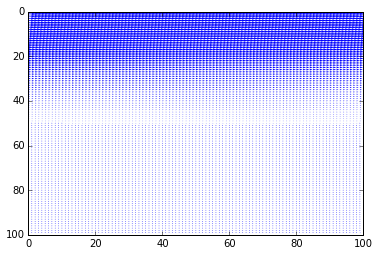

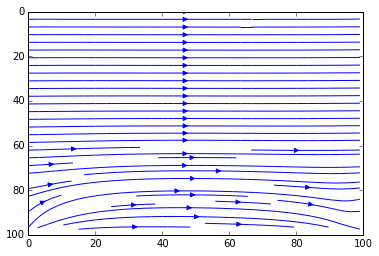

In [107]:
def addSlidingLidVelocity(grid, rho):
    f0 = grid[0,:,0]
    f1 = grid[0,:,1]
    f2 = grid[0,:,2]
    f3 = grid[0,:,3]
    f5 = grid[0,:,5]
    f6 = grid[0,:,6]
    
    rhoWall = f1 + f3 + f0 + 2 * (f6 + f2 + f5)
    vLid = 0.1
    
    ch = 7
    #grid[0,:,ch] -= 2 * w[ch] * rhoWall * (cu[0,:,ch] / cS**2)
    grid[0,:,ch] -= 6 * w[ch] * rhoWall * vLid
    
    ch = 8
    #grid[0,:,ch] -= 2 * w[ch] * rhoWall * (cu[0,:,ch] / cS**2)
    grid[0,:,ch] += 6 * w[ch] * rhoWall * vLid
    
    return grid
    
def mask_couette(grid):
    
    mask[0,:,2] = True
    mask[0,:,5] = True
    mask[0,:,6] = True
    
    mask[-1,:,4] = True
    mask[-1,:,7] = True
    mask[-1,:,8] = True
    
    return mask

doBounce = True
# create empty temporary lattice in which the old values (before shifiting) are stored
saved_latt = np.zeros((latt.shape))
# create empty mask lattice
mask = np.zeros((latt.shape))
# create mask for shift_latt function in order to know which channels have to be bounced back at which position
mask = mask_couette(latt)


rho = np.full((rho.shape), 1.0)
u = np.full((u.shape), 0.0)
latt = calc_equilibrium(rho, u, c, w)
omega = 0.5

for t in range(timesteps):
    latt = shift_latt(latt)
    latt = addSlidingLidVelocity(latt, rho)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    u = calc_avg_vel(rho, j)
    print(u[:,:,0])
    f_eq = calc_equilibrium(rho, u, c, w)
    latt += omega * (f_eq - latt)
    
    
x = np.arange(rows)
y = np.arange(cols)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.ylim(rows,0)
plt.quiver(Y, X, u[:,:,1].T, u[:,:,0].T, color='b')

plt.figure()
plt.streamplot(X, Y, u[:,:,1], u[:,:,0], color='b')
plt.ylim(len(Y), 0)

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
[[ 0.97944444  1.          1.         ...,  1.          1.          1.02256481]
 [ 0.99299074  1.          1.         ...,  1.          1.          1.00687963]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 ..., 
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.96069459  0.99289555  1.         ...,  1.          1.00755843
   1.0427791 ]
 [ 0.97859797  0.99718062  1.         ...,  1.          1.00335402
   1.0220071 ]
 [ 0.99492361  0.9969291   1.         ...,  1.          1.00298624
   1.00503093]
 ..., 
 [ 1.          1.          1.         ...,  1.          1. 

[[ 0.85497088  0.90412947  0.92734007 ...,  1.0837372   1.11482974
   1.18025665]
 [ 0.88889698  0.91992995  0.9345559  ...,  1.07534125  1.09626816
   1.13698429]
 [ 0.91777674  0.93085407  0.94196168 ...,  1.06619193  1.08087255
   1.09846241]
 ..., 
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.85452063  0.90372916  0.92698552 ...,  1.08440844  1.11559469
   1.1811351 ]
 [ 0.88847734  0.9195182   0.93417302 ...,  1.07603619  1.09702016
   1.13782325]
 [ 0.9173091   0.93042918  0.94155053 ...,  1.06688158  1.08158774
   1.09925549]
 ..., 
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.8541288

[[ 0.85110532  0.90077751  0.92449804 ...,  1.09137692  1.12345599
   1.19022433]
 [ 0.88510044  0.91646645  0.93146408 ...,  1.08320412  1.10486672
   1.14671193]
 [ 0.91374634  0.92713928  0.93847678 ...,  1.07412641  1.08928359
   1.10762939]
 ..., 
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.85110088  0.90078166  0.92451278 ...,  1.09146016  1.12356357
   1.19034834]
 [ 0.88510475  0.91646802  0.93147255 ...,  1.08329957  1.10497486
   1.14682913]
 [ 0.91373624  0.92713735  0.93848004 ...,  1.07422353  1.0893875
   1.10774912]
 ..., 
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.85110578

[[ 0.85183216  0.90162553  0.92546877 ...,  1.09244214  1.12475571
   1.19181602]
 [ 0.88581597  0.9172585   0.93236382 ...,  1.08440741  1.10625011
   1.14830707]
 [ 0.91439631  0.92785096  0.93926958 ...,  1.0754172   1.09071088
   1.1092216 ]
 ..., 
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.85186924  0.90166617  0.92551292 ...,  1.09244874  1.12477269
   1.19183702]
 [ 0.88585728  0.91729812  0.93240589 ...,  1.08441994  1.10626705
   1.14832398]
 [ 0.91443077  0.92788867  0.93930946 ...,  1.07543163  1.09072771
   1.10924433]
 ..., 
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.8519093

[[ 0.85290728  0.90276252  0.92664671 ...,  1.09250586  1.12490006
   1.19207567]
 [ 0.88688347  0.91836474  0.93351591 ...,  1.08453379  1.10643918
   1.14855515]
 [ 0.91543965  0.92892048  0.94037671 ...,  1.07559682  1.09094317
   1.1095124 ]
 ..., 
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.85294298  0.90280049  0.92668639 ...,  1.09250157  1.12490211
   1.19207938]
 [ 0.88692187  0.9184022   0.93355468 ...,  1.08453281  1.10644059
   1.14855533]
 [ 0.91547409  0.92895676  0.94041421 ...,  1.07559719  1.0909448
   1.10951723]
 ..., 
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
[[ 0.85298027

[[ 0.85386608  0.9037669   0.92767359 ...,  1.09231014  1.12476265
   1.19201947]
 [ 0.88784094  0.91935059  0.93453212 ...,  1.08436212  1.10631678
   1.14846455]
 [ 0.91638929  0.92988786  0.94137019 ...,  1.07545148  1.09084316
   1.10945058]
 ..., 
 [ 0.99996133  0.99995797  0.99995445 ...,  1.00004763  1.00004389
   1.00004032]
 [ 0.99996914  0.99996585  0.99996229 ...,  1.00003923  1.0000355
   1.00003206]
 [ 0.99997425  0.99996983  0.99996623 ...,  1.00003504  1.00003128
   1.00002666]]
[[ 0.85389915  0.90380226  0.92771068 ...,  1.09228298  1.12474267
   1.1920024 ]
 [ 0.88787629  0.91938588  0.93456906 ...,  1.08433567  1.10629449
   1.14844202]
 [ 0.91642248  0.92992275  0.94140667 ...,  1.07542493  1.09081986
   1.10943061]
 ..., 
 [ 0.99995234  0.99994832  0.9999441  ...,  1.00005863  1.00005415
   1.00004984]
 [ 0.99996158  0.99995759  0.99995328 ...,  1.00004876  1.00004422
   1.00004003]
 [ 0.99996771  0.99996231  0.99995791 ...,  1.00004381  1.00003921
   1.00003353]]
[

[[ 0.85580572  0.90585881  0.92985765 ...,  1.08912026  1.12167819
   1.18912755]
 [ 0.88984076  0.92144471  0.93675132 ...,  1.08107836  1.1031167
   1.1452548 ]
 [ 0.91845436  0.93202503  0.94361137 ...,  1.07211028  1.08756542
   1.10620991]
 ..., 
 [ 0.9980606   0.99798688  0.99791334 ...,  1.00235204  1.00226728
   1.00218215]
 [ 0.99817429  0.99808668  0.99799232 ...,  1.00226011  1.00215228
   1.00205248]
 [ 0.99828647  0.99815033  0.99804194 ...,  1.00220302  1.00207983
   1.00192292]]
[[ 0.85596006  0.90602403  0.93002726 ...,  1.08887961  1.12144032
   1.18889788]
 [ 0.89000041  0.92160926  0.93692304 ...,  1.08083376  1.10287157
   1.14500245]
 [ 0.91861696  0.9321922   0.94378375 ...,  1.07186343  1.08731651
   1.10596042]
 ..., 
 [ 0.99788968  0.99781202  0.99773469 ...,  1.00255784  1.00246855
   1.00237875]
 [ 0.99800774  0.99791513  0.99781538 ...,  1.00246401  1.00234979
   1.00224411]
 [ 0.99812605  0.99798165  0.99786675 ...,  1.00240494  1.00227409
   1.00210728]]
[

[[ 0.86342658  0.91378904  0.93772778 ...,  1.0806757   1.11309978
   1.18079252]
 [ 0.89744668  0.92918921  0.94460746 ...,  1.07256663  1.09445414
   1.13627872]
 [ 0.92610857  0.93974075  0.95137224 ...,  1.06363208  1.07893315
   1.09745161]
 ..., 
 [ 0.99094122  0.99082197  0.99070865 ...,  1.01056019  1.01043603
   1.01030664]
 [ 0.99108103  0.99092795  0.99076171 ...,  1.01051544  1.01033239
   1.01016519]
 [ 0.99129045  0.9910275   0.99082303 ...,  1.01045374  1.01022758
   1.00993259]]
[[ 0.86377318  0.91414342  0.93807339 ...,  1.08037054  1.11278952
   1.18048809]
 [ 0.89778662  0.92953083  0.9449486  ...,  1.07226298  1.09414379
   1.13595311]
 [ 0.92644335  0.94007556  0.95170502 ...,  1.06333349  1.07862838
   1.09714164]
 ..., 
 [ 0.99065854  0.99054122  0.99043016 ...,  1.01086453  1.01074367
   1.01061731]
 [ 0.99079551  0.9906444   0.99048039 ...,  1.01082356  1.01064399
   1.01047996]
 [ 0.99100366  0.99074293  0.99054058 ...,  1.01076348  1.01054081
   1.0102498 ]]


[[ 0.87104397  0.92149322  0.94519381 ...,  1.07446773  1.10671959
   1.17449534]
 [ 0.90480572  0.93656528  0.9519353  ...,  1.06640486  1.08813643
   1.12964478]
 [ 0.93331251  0.94691246  0.95848757 ...,  1.05760952  1.07278914
   1.09117241]
 ..., 
 [ 0.98615331  0.98615055  0.98616817 ...,  1.01501944  1.01505054
   1.0150645 ]
 [ 0.98613798  0.9861218   0.98611795 ...,  1.01508528  1.01509874
   1.01510125]
 [ 0.98617751  0.98612527  0.98610375 ...,  1.0151073   1.01510513
   1.01507889]]
[[ 0.87124638  0.92169637  0.94539096 ...,  1.07430395  1.10655253
   1.17432726]
 [ 0.90500119  0.93676005  0.95212813 ...,  1.06624372  1.08797142
   1.12946956]
 [ 0.9335018   0.94710076  0.95867457 ...,  1.05745317  1.07262992
   1.09100984]
 ..., 
 [ 0.98613495  0.98613839  0.98616269 ...,  1.01499457  1.01503255
   1.01505311]
 [ 0.98611061  0.98610221  0.98610753 ...,  1.01506492  1.01508809
   1.015099  ]
 [ 0.98613826  0.98609923  0.9860886  ...,  1.01509166  1.01510117
   1.01508966]]


[[ 0.87429591  0.92479736  0.94848041 ...,  1.07157622  1.10372305
   1.17143473]
 [ 0.90803865  0.93983595  0.95518229 ...,  1.06355525  1.08520426
   1.12654142]
 [ 0.93653366  0.95012721  0.9616958  ...,  1.05484491  1.0699717
   1.08827933]
 ..., 
 [ 0.99101319  0.99113364  0.99126046 ...,  1.0090972   1.00923063
   1.00936212]
 [ 0.99079368  0.99094841  0.9911265  ...,  1.00922815  1.00941639
   1.00958478]
 [ 0.99052483  0.9907941   0.99100566 ...,  1.0093466   1.00957105
   1.00986655]]
[[ 0.8743481   0.92485393  0.94854195 ...,  1.07151587  1.10365823
   1.17136685]
 [ 0.90809668  0.93989816  0.95524515 ...,  1.06349544  1.08514207
   1.12647637]
 [ 0.93659712  0.95019172  0.96176136 ...,  1.0547867   1.06991223
   1.08821758]
 ..., 
 [ 0.99135906  0.99148091  0.9916078  ...,  1.00873017  1.00886342
   1.00899585]
 [ 0.99113634  0.99129376  0.99147381 ...,  1.00886052  1.00905022
   1.00922071]
 [ 0.99086096  0.99113659  0.99135149 ...,  1.00897998  1.00920711
   1.00950799]]
[

[[ 0.87489026  0.92553467  0.94939945 ...,  1.07059522  1.10269342
   1.17031866]
 [ 0.90885371  0.9407672   0.95615667 ...,  1.06259488  1.08421115
   1.1254891 ]
 [ 0.93749842  0.95114729  0.96276327 ...,  1.05391207  1.06902036
   1.08729971]
 ..., 
 [ 0.99966882  0.99977094  0.99985729 ...,  1.00031179  1.00040012
   1.00050378]
 [ 0.99946368  0.99961011  0.99976079 ...,  1.00039628  1.00054753
   1.00069479]
 [ 0.99917946  0.99946038  0.9996552  ...,  1.000493    1.00068782
   1.0009725 ]]
[[ 0.87489665  0.92554739  0.94942054 ...,  1.07057137  1.10266667
   1.17028931]
 [ 0.90886948  0.94078856  0.95618054 ...,  1.06257122  1.08418624
   1.12546352]
 [ 0.9375217   0.95117311  0.96279155 ...,  1.05388891  1.06899664
   1.08727482]
 ..., 
 [ 0.99999638  1.00009645  1.0001805  ...,  0.99999162  1.00007739
   1.00017863]
 [ 0.99979449  0.9999385   1.00008625 ...,  1.00007371  1.00022166
   1.00036602]
 [ 0.99951423  0.99979119  0.9999827  ...,  1.00016834  1.00035936
   1.00063925]]


   0.99509161]]
[[ 0.87489815  0.92566573  0.94969747 ...,  1.07023613  1.10230786
   1.16987309]
 [ 0.90905851  0.94107079  0.95651014 ...,  1.06224975  1.0838495
   1.12510508]
 [ 0.93783437  0.95153584  0.9631994  ...,  1.05358004  1.06867893
   1.0869458 ]
 ..., 
 [ 1.0057723   1.005831    1.00587619 ...,  0.99452774  0.99456873
   0.99462136]
 [ 1.00564489  1.00573417  1.00582283 ...,  0.99456924  0.99465003
   0.99473079]
 [ 1.00546637  1.00564359  1.00576249 ...,  0.99462123  0.9947299
   0.99489455]]
[[ 0.87489193  0.92566323  0.9497004  ...,  1.07022986  1.10230192
   1.16986425]
 [ 0.90905935  0.94107419  0.95651485 ...,  1.06224462  1.08384399
   1.12509816]
 [ 0.93783865  0.95154178  0.96320659 ...,  1.05357576  1.06867424
   1.08694105]
 ..., 
 [ 1.00597274  1.00602995  1.00607393 ...,  0.9943466   0.99438618
   0.99443709]
 [ 1.00584829  1.00593544  1.00602195 ...,  0.99438686  0.99446524
   0.99454359]
 [ 1.005674    1.0058471   1.0059632  ...,  0.99443735  0.9945429
   

[[ 0.8743922   0.92518327  0.94928318 ...,  1.07050392  1.10254275
   1.17003287]
 [ 0.90864524  0.9406831   0.95611908 ...,  1.06254504  1.08412035
   1.12536299]
 [ 0.93747149  0.95118038  0.96284454 ...,  1.05390015  1.06898119
   1.08723383]
 ..., 
 [ 1.00923096  1.00926394  1.00928806 ...,  0.99151602  0.99153537
   0.99156081]
 [ 1.00915628  1.00920793  1.00925831 ...,  0.99153936  0.99158076
   0.99162206]
 [ 1.0090528   1.0091565   1.00922522 ...,  0.99156771  0.99162445
   0.99171131]]
[[ 0.87433844  0.92512737  0.94922813 ...,  1.07054552  1.10258344
   1.1700678 ]
 [ 0.90859358  0.9406302   0.9560643  ...,  1.06258907  1.08416312
   1.12540486]
 [ 0.93741952  0.95112767  0.96279054 ...,  1.05394604  1.06902605
   1.08727823]
 ..., 
 [ 1.00934745  1.00937946  1.00940269 ...,  0.99141814  0.99143684
   0.99146145]
 [ 1.00927471  1.00932497  1.00937386 ...,  0.99144096  0.99148112
   0.99152119]
 [ 1.00917393  1.00927496  1.00934174 ...,  0.99146861  0.99152369
   0.99160809]]


[[ 0.87132983  0.92196678  0.94605363 ...,  1.07334318  1.1053354
   1.17262291]
 [ 0.90557207  0.93753224  0.95289129 ...,  1.06546012  1.08700918
   1.12829414]
 [ 0.9343675   0.94803277  0.95964953 ...,  1.05685538  1.07192644
   1.09017389]
 ..., 
 [ 1.01121694  1.01121864  1.01120771 ...,  0.98969358  0.98969263
   0.98969851]
 [ 1.01120261  1.01121198  1.01121098 ...,  0.98970139  0.98971056
   0.98972402]
 [ 1.0111784   1.01120453  1.01121067 ...,  0.98971175  0.98972778
   0.98976092]]
[[ 0.87115447  0.92178348  0.94586988 ...,  1.07352191  1.10551325
   1.17279332]
 [ 0.90539483  0.93735136  0.95270791 ...,  1.06564132  1.08719107
   1.12848147]
 [ 0.93418912  0.94785275  0.95946834 ...,  1.05703658  1.07210905
   1.09035759]
 ..., 
 [ 1.01123604  1.01123618  1.01122337 ...,  0.98965914  0.9896571
   0.98966212]
 [ 1.01122476  1.01123208  1.01122846 ...,  0.98966606  0.98967371
   0.98968604]
 [ 1.01120444  1.01122688  1.0112299  ...,  0.98967549  0.98968972
   0.98972079]]
[[

   0.98987937]]
[[ 0.86633919  0.91681225  0.94093096 ...,  1.07895712  1.11106964
   1.17828685]
 [ 0.90055657  0.93243848  0.94779349 ...,  1.07110179  1.09276962
   1.13429284]
 [ 0.92932221  0.94298202  0.95461518 ...,  1.06243456  1.07761672
   1.09597291]
 ..., 
 [ 1.00960788  1.00956131  1.00949934 ...,  0.99011342  0.9900726
   0.99004572]
 [ 1.00969957  1.00964194  1.00956193 ...,  0.99007939  0.99003127
   0.9900001 ]
 [ 1.00981386  1.00971314  1.00962141 ...,  0.99004799  0.98999511
   0.98994415]]
[[ 0.86620304  0.91667348  0.94079406 ...,  1.07913201  1.11125143
   1.17847362]
 [ 0.90041965  0.9323005   0.94765766 ...,  1.07127514  1.09294952
   1.13448382]
 [ 0.929185    0.94284562  0.95448074 ...,  1.06260373  1.07779139
   1.09615302]
 ..., 
 [ 1.00946346  1.00941542  1.00935228 ...,  0.99019388  0.99015164
   0.99012339]
 [ 1.00955891  1.00949901  1.00941672 ...,  0.99015796  0.99010755
   0.99007442]
 [ 1.00967828  1.00957298  1.0094782  ...,  0.99012463  0.99006886
 

[[ 0.86483302  0.91529183  0.9394189  ...,  1.08138723  1.11368756
   1.18111163]
 [ 0.89901662  0.93087886  0.9462924  ...,  1.07347646  1.09529354
   1.13702506]
 [ 0.92775056  0.9414283   0.95310107 ...,  1.06472281  1.08001538
   1.09849446]
 ..., 
 [ 1.00452867  1.00446274  1.00439635 ...,  0.99375661  0.993694
   0.99363847]
 [ 1.00467736  1.00458502  1.00447957 ...,  0.99368394  0.99359156
   0.99351568]
 [ 1.00487278  1.00469615  1.00456441 ...,  0.99361139  0.99349923
   0.99335509]]
[[ 0.86485603  0.91531524  0.93944008 ...,  1.08139221  1.11369639
   1.18112955]
 [ 0.89903658  0.93089823  0.94631316 ...,  1.07347892  1.09529907
   1.13703477]
 [ 0.92776894  0.94144648  0.95311966 ...,  1.06472341  1.0800179
   1.09849932]
 ..., 
 [ 1.00430341  1.00423753  1.00417182 ...,  0.99395018  0.99388742
   0.99383123]
 [ 1.00445229  1.00435974  1.00425464 ...,  0.9938768   0.9937836
   0.99370657]
 [ 1.00464822  1.00447086  1.00433924 ...,  0.9938034   0.99368994
   0.99354324]]
[[ 0

[[ 0.86650497  0.91696571  0.9409875  ...,  1.08027852  1.11262198
   1.18020973]
 [ 0.90058436  0.93241658  0.94783259 ...,  1.07232884  1.09416528
   1.13589584]
 [ 0.92925425  0.94291016  0.95456596 ...,  1.06356973  1.07886324
   1.09735339]
 ..., 
 [ 0.99903366  0.99897926  0.9989338  ...,  0.99925055  0.99919455
   0.99913383]
 [ 0.99915387  0.99907398  0.99899196 ...,  0.99917947  0.99908485
   0.99899701]
 [ 0.99931568  0.99916004  0.99905292 ...,  0.99910593  0.99898534
   0.99881237]]
[[ 0.86659219  0.91705231  0.94106872 ...,  1.08021114  1.11255284
   1.18014425]
 [ 0.90066631  0.93249722  0.94791217 ...,  1.07226057  1.09409551
   1.13582356]
 [ 0.92933366  0.94298808  0.95464239 ...,  1.06350232  1.07879437
   1.09728297]
 ..., 
 [ 0.99885014  0.99879637  0.99875161 ...,  0.9994638   0.99940831
   0.99934781]
 [ 0.99896847  0.99888948  0.99880857 ...,  0.99939346  0.99929937
   0.99921176]
 [ 0.99912786  0.99897404  0.99886827 ...,  0.99932059  0.99920049
   0.99902789]]


   1.00340949]]
[[ 0.8683589   0.91878729  0.94267829 ...,  1.07890638  1.11120544
   1.17882751]
 [ 0.90231015  0.93410119  0.94947756 ...,  1.07095401  1.09274559
   1.13439596]
 [ 0.93090334  0.94452208  0.95613557 ...,  1.06222517  1.07747861
   1.09592725]
 ..., 
 [ 0.99532493  0.99528414  0.99525052 ...,  1.00393293  1.00389036
   1.00383964]
 [ 0.99540268  0.99534384  0.99528418 ...,  1.00388379  1.00380784
   1.00373362]
 [ 0.99550928  0.99539748  0.99531951 ...,  1.00383155  1.00373271
   1.00358651]]
[[ 0.86841389  0.91883981  0.9427254  ...,  1.07887104  1.11116711
   1.17878906]
 [ 0.90235931  0.93414841  0.94952258 ...,  1.07091886  1.09270821
   1.13435586]
 [ 0.93094923  0.94456617  0.95617768 ...,  1.0621913   1.07744304
   1.09588968]
 ..., 
 [ 0.9951991   0.99515877  0.99512545 ...,  1.00410294  1.00406092
   1.00401075]
 [ 0.99527539  0.99521731  0.99515836 ...,  1.00405479  1.00397976
   1.00390637]
 [ 0.9953801   0.9952699   0.9951929  ...,  1.00400352  1.00390581


[[ 0.86883855  0.91918304  0.94295869 ...,  1.07874602  1.11099821
   1.17858289]
 [ 0.90266107  0.93439254  0.94971163 ...,  1.07081027  1.0925634
   1.13416719]
 [ 0.93116711  0.94474401  0.95631117 ...,  1.06210962  1.07733484
   1.09575165]
 ..., 
 [ 0.9928509   0.99281858  0.99279053 ...,  1.00726506  1.00723466
   1.00719692]
 [ 0.99290328  0.99285844  0.99281182 ...,  1.00723585  1.00718115
   1.00712652]
 [ 0.99297657  0.9928941   0.9928341  ...,  1.00720428  1.00713246
   1.00702621]]
[[ 0.86881873  0.91915838  0.94292962 ...,  1.07877157  1.11102299
   1.17860467]
 [ 0.9026361   0.93436432  0.94968078 ...,  1.070837    1.09258927
   1.13419209]
 [ 0.931138    0.94471312  0.95627836 ...,  1.06213734  1.07736202
   1.09577826]
 ..., 
 [ 0.99275984  0.99272781  0.99269997 ...,  1.00738313  1.00735324
   1.00731604]
 [ 0.99281142  0.99276705  0.99272088 ...,  1.00735465  1.00730085
   1.00724703]
 [ 0.99288367  0.99280216  0.99274278 ...,  1.00732388  1.00725326
   1.00714868]]
[

   1.00957191]]
[[ 0.86722524  0.91742144  0.94110514 ...,  1.08027389  1.11251959
   1.18002461]
 [ 0.90092447  0.93256708  0.94782491 ...,  1.07235958  1.09411534
   1.13575077]
 [ 0.92933891  0.94287133  0.95439791 ...,  1.0636627   1.0788976
   1.09731872]
 ..., 
 [ 0.99072871  0.99070664  0.99068926 ...,  1.00974019  1.00972712
   1.00970604]
 [ 0.99075729  0.99072694  0.99069688 ...,  1.00973521  1.00970864
   1.0096785 ]
 [ 0.99080146  0.9907462   0.99070666 ...,  1.00972792  1.00969126
   1.00963379]]
[[ 0.86714097  0.91733237  0.94101433 ...,  1.0803466   1.11259402
   1.1800967 ]
 [ 0.9008375   0.9324772   0.94773364 ...,  1.07243274  1.09418989
   1.1358278 ]
 [ 0.92924943  0.94278084  0.95430662 ...,  1.06373513  1.0789713
   1.09739368]
 ..., 
 [ 0.99067251  0.99065105  0.9906344  ...,  1.00979348  1.00978128
   1.00976098]
 [ 0.99069985  0.99067027  0.99064119 ...,  1.00978966  1.00976439
   1.00973531]
 [ 0.99074257  0.99068867  0.99065028 ...,  1.00978346  1.00974841
  

[[ 0.86513411  0.91524603  0.93892007 ...,  1.08197388  1.11426842
   1.18175359]
 [ 0.89880584  0.93040025  0.94564327 ...,  1.07405238  1.09585383
   1.13757473]
 [ 0.9271944   0.94071269  0.95223243 ...,  1.06531931  1.08059284
   1.09905372]
 ..., 
 [ 0.9901471   0.99015328  0.99016786 ...,  1.00994266  1.00996058
   1.00996977]
 [ 0.99012019  0.99012626  0.99014036 ...,  1.00997947  1.00999995
   1.01001136]
 [ 0.99009839  0.99010696  0.99011966 ...,  1.01000957  1.01003049
   1.01005106]]
[[ 0.86507717  0.91518814  0.93886324 ...,  1.08201513  1.11431112
   1.1817971 ]
 [ 0.89874981  0.93034383  0.9455871  ...,  1.07409281  1.09589584
   1.13761993]
 [ 0.92713913  0.94065741  0.95217735 ...,  1.06535812  1.0806329
   1.09909513]
 ..., 
 [ 0.99017572  0.9901834   0.99019955 ...,  1.00989172  1.009911
   1.00992164]
 [ 0.99014592  0.99015396  0.99017034 ...,  1.0099303   1.00995292
   1.00996637]
 [ 0.99012053  0.99013263  0.9901481  ...,  1.00996199  1.00998552
   1.01000988]]
[[ 

[[ 0.86437079  0.91451454  0.9382523  ...,  1.08232454  1.1146583
   1.18217058]
 [ 0.89812285  0.92973961  0.94500202 ...,  1.07438689  1.09622054
   1.13799132]
 [ 0.92656244  0.94009555  0.95162883 ...,  1.06562328  1.08091856
   1.09940874]
 ..., 
 [ 0.99259522  0.99264251  0.99269569 ...,  1.00693978  1.00699006
   1.0070382 ]
 [ 0.99248832  0.99255107  0.99262672 ...,  1.00701313  1.00708825
   1.00715418]
 [ 0.99236099  0.99247468  0.9925646  ...,  1.00707886  1.00716948
   1.00729315]]
[[ 0.86437111  0.9145181   0.93825958 ...,  1.08230952  1.11464454
   1.18215759]
 [ 0.89812818  0.92974701  0.94501061 ...,  1.07437164  1.09620599
   1.13797709]
 [ 0.9265708   0.94010505  0.95163917 ...,  1.06560753  1.08090316
   1.09939403]
 ..., 
 [ 0.99275092  0.99279945  0.99285358 ...,  1.00677     1.00682109
   1.00687039]
 [ 0.99264156  0.99270613  0.99278359 ...,  1.00684398  1.00692065
   1.00698822]
 [ 0.99251071  0.99262795  0.99272027 ...,  1.00691051  1.00700326
   1.00713011]]
[

[[ 0.86489725  0.91516896  0.93903918 ...,  1.08139183  1.11373146
   1.18126083]
 [ 0.89881987  0.93052512  0.94583345 ...,  1.07344814  1.09528581
   1.13704551]
 [ 0.92737664  0.94095285  0.95252194 ...,  1.06468041  1.07997633
   1.09846975]
 ..., 
 [ 0.99798544  0.99804745  0.99810559 ...,  1.00141585  1.00147102
   1.00153298]
 [ 0.99784679  0.99793515  0.99803114 ...,  1.00148584  1.00157786
   1.00166602]
 [ 0.99766642  0.99783518  0.99795645 ...,  1.00155488  1.00167131
   1.00184095]]
[[ 0.86493206  0.91520952  0.93908533 ...,  1.08134158  1.11368146
   1.18121107]
 [ 0.8988618   0.93057097  0.94588144 ...,  1.07339784  1.09523545
   1.13699369]
 [ 0.92742332  0.94100158  0.95257243 ...,  1.06463031  1.07992607
   1.09841937]
 ..., 
 [ 0.99819504  0.99825676  0.99831428 ...,  1.00120987  1.00126456
   1.00132628]
 [ 0.9980568   0.99814498  0.99824048 ...,  1.00127898  1.00137057
   1.00145847]
 [ 0.99787657  0.9980453   0.99816618 ...,  1.00134745  1.00146356
   1.00163292]]


[[ 0.86627062  0.916717    0.94074122 ...,  1.0795845   1.111911
   1.17945938]
 [ 0.90038414  0.93220931  0.94758703 ...,  1.07163074  1.09345634
   1.13516339]
 [ 0.92907992  0.94271743  0.95434258 ...,  1.06286803  1.07815299
   1.09663149]
 ..., 
 [ 1.00318286  1.00322149  1.00325029 ...,  0.99638641  0.99641671
   0.99645696]
 [ 1.00308612  1.00314681  1.00320648 ...,  0.99642435  0.99648381
   0.99654499]
 [ 1.00295383  1.00307731  1.00315794 ...,  0.9964668   0.99654604
   0.9966693 ]]
[[ 0.86633642  0.91678931  0.94081848 ...,  1.0795036   1.11182971
   1.17937904]
 [ 0.90045617  0.93228558  0.94766595 ...,  1.0715494   1.09337434
   1.13507855]
 [ 0.92915639  0.94279618  0.95442341 ...,  1.06278703  1.0780713
   1.09654905]
 ..., 
 [ 1.00332743  1.00336486  1.00339238 ...,  0.99624761  0.9962768
   0.99631593]
 [ 1.00323296  1.00329207  1.0033499  ...,  0.99628427  0.99634208
   0.99640172]
 [ 1.00310361  1.00322426  1.00330266 ...,  0.99632554  0.99640284
   0.99652332]]
[[ 0

[[ 0.86854619  0.91916258  0.94328759 ...,  1.07698829  1.10927815
   1.17686435]
 [ 0.90278871  0.93472216  0.95016577 ...,  1.06901928  1.09080941
   1.13242162]
 [ 0.93158693  0.94527811  0.95695258 ...,  1.0602713   1.07552441
   1.09396723]
 ..., 
 [ 1.00581825  1.0058243   1.00582081 ...,  0.99381348  0.99381488
   0.99382426]
 [ 1.00578593  1.00580173  1.00581078 ...,  0.99382175  0.99383551
   0.99385423]
 [ 1.00574124  1.00578053  1.00579808 ...,  0.99383362  0.99385578
   0.99389913]]
[[ 0.86864049  0.91926216  0.94338916 ...,  1.07688751  1.10917588
   1.17676328]
 [ 0.90288588  0.93482242  0.95026786 ...,  1.06891821  1.09070665
   1.13231455]
 [ 0.93168636  0.94537904  0.95705478 ...,  1.06017117  1.07542275
   1.09386398]
 ..., 
 [ 1.00585958  1.00586465  1.00586023 ...,  0.99376979  0.99377037
   0.99377884]
 [ 1.00582934  1.00584372  1.0058512  ...,  0.99377724  0.9937896
   0.99380693]
 [ 1.00578761  1.0058241   1.00583964 ...,  0.99378818  0.9938086
   0.9938493 ]]
[[

[[ 0.87074339  0.92145682  0.94559823 ...,  1.07476581  1.10700537
   1.17461556]
 [ 0.90501479  0.93700414  0.95247678 ...,  1.06679311  1.08853611
   1.13004863]
 [ 0.93384438  0.94755862  0.95925191 ...,  1.05807146  1.07328459
   1.09168443]
 ..., 
 [ 1.00600736  1.00599545  1.00597536 ...,  0.99347785  0.99346439
   0.99345698]
 [ 1.00601635  1.00600522  1.0059846  ...,  0.99347183  0.99345928
   0.99345313]
 [ 1.00603039  1.00601561  1.0059945  ...,  0.99346637  0.99345433
   0.99344817]]
[[ 0.87083494  0.92155131  0.94569216 ...,  1.07467896  1.10691574
   1.17452669]
 [ 0.90510592  0.93709694  0.95257022 ...,  1.06670625  1.08844696
   1.12995536]
 [ 0.93393592  0.94765064  0.95934427 ...,  1.05798589  1.07319719
   1.09159498]
 ..., 
 [ 1.00598376  1.00597128  1.00595066 ...,  0.99349062  0.99347667
   0.99346872]
 [ 1.00599426  1.00598222  1.0059606  ...,  0.99348416  0.99347072
   0.99346382]
 [ 1.0060104   1.00599376  1.00597133 ...,  0.99347811  0.99346483
   0.99345707]]


[[ 0.87280269  0.92355739  0.94765924 ...,  1.07294593  1.10512465
   1.17273992]
 [ 0.90703055  0.93903929  0.95451455 ...,  1.06498158  1.08667083
   1.12808348]
 [ 0.93583993  0.94955661  0.96124944 ...,  1.05629591  1.07146682
   1.08981971]
 ..., 
 [ 1.00467954  1.0046567   1.00462713 ...,  0.99439189  0.99436949
   0.99435243]
 [ 1.00472215  1.00469281  1.00465245 ...,  0.99437517  0.99434524
   0.99432349]
 [ 1.00478256  1.00472864  1.00468081 ...,  0.99435612  0.99432082
   0.99428123]]
[[ 0.87285822  0.92361299  0.94771263 ...,  1.0729021   1.10507931
   1.17269425]
 [ 0.90708344  0.93909193  0.9545668  ...,  1.06493833  1.08662607
   1.12803574]
 [ 0.93589099  0.94960741  0.9612999  ...,  1.05625391  1.07142366
   1.08977528]
 ..., 
 [ 1.00460729  1.00458421  1.00455448 ...,  0.9944448   0.99442221
   0.99440496]
 [ 1.00465087  1.00462108  1.00458026 ...,  0.9944277   0.99439735
   0.99437516]
 [ 1.00471259  1.00465763  1.00460915 ...,  0.9944082   0.99437241
   0.99433188]]


[[ 0.87369447  0.92441462  0.94844247 ...,  1.07236681  1.10450854
   1.17211132]
 [ 0.90782759  0.93980959  0.95526334 ...,  1.06441759  1.08607607
   1.12743911]
 [ 0.93657325  0.95027174  0.96194824 ...,  1.05575927  1.07090875
   1.08923629]
 ..., 
 [ 1.00229345  1.00226794  1.00223925 ...,  0.99622297  0.99619871
   0.99617859]
 [ 1.00235361  1.00231733  1.00227228 ...,  0.99619804  0.99616117
   0.99613251]
 [ 1.00243679  1.00236521  1.002309   ...,  0.99616939  0.99612384
   0.99606681]]
[[ 0.87370047  0.92441814  0.94844304 ...,  1.07236923  1.10451048
   1.17211237]
 [ 0.90782987  0.93981009  0.95526266 ...,  1.0644207   1.08607866
   1.12744083]
 [ 0.93657266  0.95027019  0.96194583 ...,  1.05576318  1.07091234
   1.08923951]
 ..., 
 [ 1.00220014  1.0021747   1.00214623 ...,  0.99629862  0.99627446
   0.99625435]
 [ 1.0022605   1.00222421  1.00217929 ...,  0.99627346  0.99623656
   0.99620773]
 [ 1.00234391  1.00227216  1.00221603 ...,  0.99624457  0.99619899
   0.99614156]]


[[ 0.87322902  0.92385467  0.94779829 ...,  1.07296897  1.10509751
   1.17266553]
 [ 0.90725692  0.93917618  0.95458806 ...,  1.06503931  1.08668913
   1.1280542 ]
 [ 0.93592386  0.9495873   0.96123263 ...,  1.05639829  1.07154442
   1.08986771]
 ..., 
 [ 0.99986061  0.99983953  0.99981934 ...,  0.99835352  0.99833321
   0.9983142 ]
 [ 0.99991568  0.99988367  0.99984757 ...,  0.99832602  0.99829144
   0.99826231]
 [ 0.99999101  0.99992571  0.99987876 ...,  0.99829532  0.99825119
   0.99819065]]
[[ 0.87318653  0.92380768  0.94774811 ...,  1.07301355  1.10514153
   1.1727077 ]
 [ 0.9072105   0.93912691  0.95453685 ...,  1.06508467  1.08673435
   1.12810047]
 [ 0.93587457  0.94953639  0.96118028 ...,  1.05644413  1.07159033
   1.08991366]
 ..., 
 [ 0.9997786   0.99975775  0.99973792 ...,  0.99843293  0.9984128
   0.99839383]
 [ 0.99983314  0.99980143  0.9997658  ...,  0.99840549  0.99837108
   0.99834208]
 [ 0.99990771  0.99984299  0.99979658 ...,  0.99837489  0.99833085
   0.99827046]]
[

[[ 0.87145716  0.92194348  0.94580756 ...,  1.07479357  1.10692349
   1.17442276]
 [ 0.90538868  0.93722104  0.95257465 ...,  1.06689066  1.08854734
   1.12996004]
 [ 0.93397823  0.94759593  0.95919875 ...,  1.0582588   1.07341538  1.09175   ]
 ..., 
 [ 0.99798623  0.9979714   0.99795916 ...,  1.00038808  1.00037259
   1.00035566]
 [ 0.99802316  0.99800024  0.99797646 ...,  1.00036446  1.00033587
   1.00030962]
 [ 0.99807352  0.99802705  0.99799528 ...,  1.00033911  1.00030171
   1.00024706]]
[[ 0.87136803  0.9218487   0.94571024 ...,  1.07488646  1.10701719
   1.17451339]
 [ 0.90529649  0.93712536  0.95247672 ...,  1.06698467  1.08864214
   1.13005748]
 [ 0.93388326  0.94749929  0.9591005  ...,  1.0583529   1.07351029
   1.09184582]
 ..., 
 [ 0.99793095  0.99791631  0.99790428 ...,  1.00045721  1.0004419
   1.00042508]
 [ 0.99796716  0.99794457  0.99792118 ...,  1.00043381  1.00040549
   1.00037931]
 [ 0.99801657  0.99797081  0.99793955 ...,  1.00040874  1.00037175
   1.00031737]]
[[ 

[[ 0.86851517  0.91884233  0.94265238 ...,  1.07795936  1.11012413
   1.17754662]
 [ 0.90237471  0.93411311  0.94940937 ...,  1.07008129  1.09177518
   1.13329638]
 [ 0.93089951  0.94447392  0.95603722 ...,  1.06143748  1.07662991
   1.09500254]
 ..., 
 [ 0.99676593  0.99675504  0.99674607 ...,  1.00207172  1.00206084
   1.00204704]
 [ 0.99678585  0.99677013  0.99675412 ...,  1.00205729  1.00203644
   1.00201561]
 [ 0.99681366  0.99678379  0.9967627  ...,  1.00204197  1.00201424
   1.00197217]]
[[ 0.86839873  0.91872052  0.94252939 ...,  1.07808767  1.1102548
   1.17767506]
 [ 0.90225647  0.93399172  0.94928629 ...,  1.07021027  1.09190626
   1.13343227]
 [ 0.93077931  0.94435247  0.95591465 ...,  1.06156552  1.0767598
   1.09513443]
 ..., 
 [ 0.99673285  0.99672204  0.99671312 ...,  1.00212081  1.00211013
   1.00209651]
 [ 0.99675231  0.99673677  0.99672092 ...,  1.00210674  1.00208623
   1.00206559]
 [ 0.99677953  0.99675009  0.99672925 ...,  1.0020918   1.00206459
   1.00202302]]
[[

   1.0030016 ]]
[[ 0.86543513  0.91563691  0.93943222 ...,  1.08137958  1.11361823
   1.18101009]
 [ 0.89926234  0.93092937  0.94619328 ...,  1.07350693  1.09526873
   1.13693655]
 [ 0.92774992  0.94129852  0.9528415  ...,  1.06482472  1.08007477
   1.09850955]
 ..., 
 [ 0.99603557  0.99602653  0.99601849 ...,  1.00307544  1.00306981
   1.0030611 ]
 [ 0.99604595  0.99603403  0.99602143 ...,  1.00307215  1.00306083
   1.0030482 ]
 [ 0.99606202  0.99604102  0.99602494 ...,  1.00306804  1.00305258
   1.00302829]]
[[ 0.86533064  0.91552879  0.93932417 ...,  1.08149502  1.11373664
   1.18112863]
 [ 0.8991573   0.93082233  0.94608561 ...,  1.07362204  1.09538663
   1.13706017]
 [ 0.92764416  0.94119214  0.95273476 ...,  1.06493799  1.08019034
   1.09862758]
 ..., 
 [ 0.99601399  0.99600503  0.99599705 ...,  1.00309905  1.00309361
   1.00308509]
 [ 0.99602409  0.99601229  0.99599982 ...,  1.00309621  1.00308525
   1.00307305]
 [ 0.99603982  0.99601909  0.99600318 ...,  1.00309254  1.00307746


[[ 0.86316967  0.91330775  0.93711815 ...,  1.08377957  1.11610526
   1.18352415]
 [ 0.897001    0.92863217  0.94389325 ...,  1.07589047  1.09772697
   1.13952872]
 [ 0.92548177  0.93902385  0.95056646 ...,  1.06715746  1.0824657
   1.10096518]
 ..., 
 [ 0.99560072  0.99559521  0.99559093 ...,  1.00335433  1.00335445
   1.00335223]
 [ 0.9956019   0.99559504  0.99558828 ...,  1.00336216  1.00336149
   1.00335908]
 [ 0.99560722  0.99559579  0.99558687 ...,  1.0033689   1.00336708
   1.00336379]]
[[ 0.86311287  0.91325006  0.93706147 ...,  1.08383355  1.11616245
   1.18358311]
 [ 0.89694508  0.92857569  0.9438372  ...,  1.0759436   1.09778262
   1.13958813]
 [ 0.92542611  0.93896834  0.95051127 ...,  1.06720883  1.0825189
   1.10102049]
 ..., 
 [ 0.99559194  0.99558664  0.99558259 ...,  1.00335035  1.00335071
   1.00334877]
 [ 0.99559268  0.9955861   0.99557967 ...,  1.00335855  1.00335828
   1.00335619]
 [ 0.99559746  0.99558653  0.995578   ...,  1.00336563  1.00336444
   1.00336188]]
[[

[[ 0.86247537  0.91262948  0.93647554 ...,  1.08419058  1.11657847
   1.18406149]
 [ 0.89634503  0.92798481  0.9432698  ...,  1.07627237  1.0981578
   1.14002453]
 [ 0.92485138  0.93840566  0.94996438 ...,  1.06749872  1.08284021
   1.10137917]
 ..., 
 [ 0.9956574   0.99565907  0.99566256 ...,  1.00288074  1.00288616
   1.00289086]
 [ 0.99564268  0.99564569  0.99565063 ...,  1.00289789  1.00290739
   1.00291548]
 [ 0.99562798  0.99563494  0.99564029 ...,  1.00291351  1.00292502
   1.00294281]]
[[ 0.86248569  0.91264192  0.93648953 ...,  1.08416345  1.11655285
   1.18403829]
 [ 0.89635734  0.92799825  0.94328449 ...,  1.07624423  1.09813061
   1.13999773]
 [ 0.92486508  0.93842014  0.94997967 ...,  1.06746967  1.08281164
   1.10135128]
 ..., 
 [ 0.99567268  0.99567463  0.99567841 ...,  1.00285103  1.00285663
   1.00286159]
 [ 0.9956573   0.99566073  0.99566611 ...,  1.00286841  1.00287823
   1.00288658]
 [ 0.99564175  0.99564949  0.99565541 ...,  1.00288423  1.00289629
   1.00291467]]
[

[[ 0.86360665  0.91385272  0.93774501 ...,  1.08254425  1.1149404
   1.18249043]
 [ 0.89753964  0.92923153  0.94455754 ...,  1.07459916  1.09648549
   1.13832077]
 [ 0.92609845  0.9396798   0.95126481 ...,  1.06581379  1.08114919
   1.09968443]
 ..., 
 [ 0.99643976  0.99644794  0.99645702 ...,  1.00181142  1.00181945
   1.00182892]
 [ 0.99640834  0.99642126  0.99643658 ...,  1.00183258  1.00184806
   1.00186339]
 [ 0.99637145  0.9963983   0.99641726 ...,  1.00185208  1.00187187
   1.00190395]]
[[ 0.86367587  0.91392628  0.93782029 ...,  1.08245726  1.11485295
   1.18240504]
 [ 0.89761142  0.92930576  0.94463338 ...,  1.07451143  1.09639702
   1.13822948]
 [ 0.92617234  0.93975487  0.9513409  ...,  1.06572625  1.0810608
   1.09959521]
 ..., 
 [ 0.99647962  0.99648795  0.99649711 ...,  1.00176664  1.00177472
   1.00178432]
 [ 0.99644775  0.99646092  0.99647646 ...,  1.0017878   1.0018034
   1.0018188 ]
 [ 0.99641025  0.99643764  0.99645692 ...,  1.00180729  1.00182737
   1.00185967]]
[[ 

[[ 0.86604385  0.91642413  0.94036053 ...,  1.07973114  1.11208838
   1.17968996]
 [ 0.90004499  0.93181439  0.94718492 ...,  1.07176876  1.09361606
   1.13534884]
 [ 0.92866567  0.94228065  0.95389406 ...,  1.06299923  1.07829848
   1.09679491]
 ..., 
 [ 0.99771379  0.99772346  0.99773171 ...,  1.00052228  1.0005297
   1.0005402 ]
 [ 0.99767574  0.99769205  0.997709   ...,  1.00054175  1.00055738
   1.00057428]
 [ 0.99763002  0.99766491  0.99768718 ...,  1.00055955  1.00058011
   1.00061506]]
[[ 0.86614411  0.91652938  0.94046713 ...,  1.07962255  1.11197803
   1.179581  ]
 [ 0.90014751  0.93191977  0.94729176 ...,  1.07165981  1.0935053
   1.13523357]
 [ 0.9287702   0.94238639  0.95400073 ...,  1.06289125  1.0781889
   1.09668359]
 ..., 
 [ 0.99776194  0.99777158  0.99777972 ...,  1.00047707  1.00048446
   1.00049497]
 [ 0.99772388  0.99774019  0.99775705 ...,  1.00049638  1.00051197
   1.00052876]
 [ 0.99767817  0.99771308  0.99773528 ...,  1.00051403  1.00053465
   1.00056945]]
[[ 

[[ 0.86887409  0.91938323  0.94334752 ...,  1.07678169  1.109076
   1.17670677]
 [ 0.90292428  0.93476915  0.95017348 ...,  1.06881234  1.0906018
   1.13220634]
 [ 0.93159411  0.94523819  0.95687334 ...,  1.06007402  1.07532484
   1.09376691]
 ..., 
 [ 0.99899355  0.99900179  0.99900671 ...,  0.99933529  0.99934188
   0.99935192]
 [ 0.99895922  0.99897386  0.99898689 ...,  0.99935166  0.99936554
   0.99938126]
 [ 0.99891937  0.99895089  0.99896888 ...,  0.99936593  0.99938421
   0.99941583]]
[[ 0.86897007  0.91948319  0.94344811 ...,  1.07668421  1.10897632
   1.17660755]
 [ 0.90302154  0.93486872  0.95027394 ...,  1.06871484  1.09050222
   1.13210213]
 [ 0.93169262  0.94533757  0.95697329 ...,  1.0599778   1.07522689
   1.09366702]
 ..., 
 [ 0.99903529  0.99904349  0.99904833 ...,  0.99929584  0.99930247
   0.99931254]
 [ 0.99900119  0.99901575  0.99902864 ...,  0.9993121   0.99932598
   0.99934159]
 [ 0.99896167  0.998993    0.99901082 ...,  0.99932623  0.99934462
   0.99937605]]
[[ 

[[ 0.87117176  0.9217678   0.94574101 ...,  1.07444487  1.10667331
   1.17430407]
 [ 0.90524305  0.93714021  0.95256007 ...,  1.06647845  1.0882103
   1.12969973]
 [ 0.93393815  0.9475995   0.95924532 ...,  1.05777458  1.07297969
   1.09136962]
 ..., 
 [ 1.00005218  1.00006037  1.0000644  ...,  0.99826487  0.99827261
   0.99828361]
 [ 1.00002414  1.00003772  1.00004845 ...,  0.99828001  0.99829452
   0.99831069]
 [ 0.99999339  1.00002075  1.00003559 ...,  0.99829249  0.99831115
   0.99834216]]
[[ 0.87123526  0.92183342  0.94580672 ...,  1.07437875  1.10660517
   1.17423527]
 [ 0.90530692  0.93720538  0.95262546 ...,  1.06641266  1.0881427
   1.1296285 ]
 [ 0.93400243  0.94766418  0.95931018 ...,  1.05771     1.07291369
   1.09130201]
 ..., 
 [ 1.00008637  1.00009459  1.00009863 ...,  0.99822704  0.99823485
   0.99824594]
 [ 1.00005853  1.00007212  1.00008283 ...,  0.99824212  0.9982567
   0.99827285]
 [ 1.00002807  1.00005534  1.00007014 ...,  0.99825453  0.99827339
   0.99830437]]
[[ 

(100, 0)

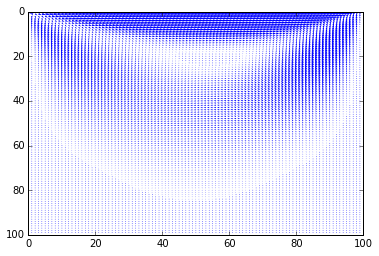

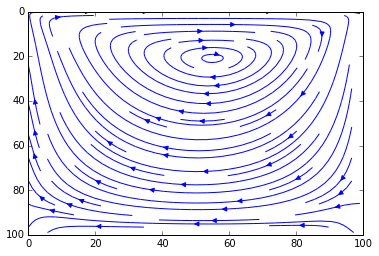

In [106]:
def addSlidingLidVelocity(grid, rho):
    rhoSlidingLid = rho[0,:]
    vLid = 0.1
    
    ch = 7
    #grid[0,:,ch] -= 2 * w[ch] * rhoWall * (cu[0,:,ch] / cS**2)
    grid[0,:,ch] -= 6 * w[ch] * rhoSlidingLid * (+vLid)
    
    ch = 8
    #grid[0,:,ch] -= 2 * w[ch] * rhoWall * (cu[0,:,ch] / cS**2)
    grid[0,:,ch] -= 6 * w[ch] * rhoSlidingLid * (-vLid)
    
    return grid
    
def mask_vortex(grid):
    
    # Top row
    mask[0,:,2] = True
    mask[0,:,5] = True
    mask[0,:,6] = True
    
    # Bottom row
    mask[-1,:,4] = True
    mask[-1,:,7] = True
    mask[-1,:,8] = True
    
    # Left column
    mask[:,0,3] = True
    mask[:,0,6] = True
    mask[:,0,7] = True
    
    # Right column
    mask[:,-1,1] = True
    mask[:,-1,5] = True
    mask[:,-1,8] = True
    
    return mask  


doBounce = True
# create empty temporary lattice in which the old values (before shifiting) are stored
saved_latt = np.zeros((latt.shape))
# create empty mask lattice
mask = np.zeros((latt.shape))
# create mask for shift_latt function in order to know which channels have to be bounced back at which position
mask = mask_vortex(latt)  


rho = np.full((rho.shape), 1.0)
u = np.full((u.shape), 0.0)
latt = calc_equilibrium(rho, u, c, w)
omega = 0.7


for t in range(timesteps):
    latt = shift_latt(latt)
    latt = addSlidingLidVelocity(latt, rho)
    j = calc_j(c, latt)
    rho = sum_occ(latt)
    print(rho)
    u = calc_avg_vel(rho, j)
    f_eq = calc_equilibrium(rho, u, c, w)
    #if t % 1 == 0:
        #print((f_eq - latt))
    latt += omega * (f_eq - latt)

x = np.arange(rows)
y = np.arange(cols)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.ylim(rows,0)
plt.quiver(Y, X, u[:,:,1].T, u[:,:,0].T, color='b')

plt.figure()
plt.streamplot(X, Y, u[:,:,1], u[:,:,0], color='b')
plt.ylim(len(Y), 0)